<a href="https://colab.research.google.com/github/shreyabucha/Instagram-Fake-account-detection/blob/main/Instagram_Fake_and_Automated_Account_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive 


from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 


# Authenticate and create the PyDrive client. 
auth.authenticate_user()
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler


# Real and Fake Account Dataset


In [ ]:
link='https://drive.google.com/file/d/13R8yzJ1k0CGHQq6V9NI47li9fzXz5E2Q/view'

# to get the id part of the file 
id = link.split("/")[-2] 

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('realAccountData.csv') 

df_realAccount = pd.read_csv('realAccountData.csv')
print(df_realAccount)


     userFollowerCount  userFollowingCount  ...  usernameLength  isFake
0                  258                 238  ...              10       0
1                  263                 482  ...               8       0
2                   51                  78  ...              10       0
3                  297                 480  ...               9       0
4                  113                 242  ...              10       0
..                 ...                 ...  ...             ...     ...
989                239                1134  ...              19       0
990                 91                 149  ...              18       0
991                 78                 783  ...              11       0
992                135                 517  ...              11       0
993                203                 823  ...              12       0

[994 rows x 9 columns]


In [ ]:
link='https://drive.google.com/file/d/1UcclPDGnAJXId1r4n5FRDhP89E8ruHoo/view?usp=sharing'

# to get the id part of the file 
id = link.split("/")[-2] 

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fakeAccountData.csv') 

df_fakeAccount = pd.read_csv('fakeAccountData.csv')
print(df_fakeAccount)

     userFollowerCount  userFollowingCount  ...  usernameLength  isFake
0                   25                1937  ...              10       1
1                  324                4122  ...              15       1
2                   15                 399  ...              12       1
3                   14                 107  ...              10       1
4                  264                4651  ...              14       1
..                 ...                 ...  ...             ...     ...
195                  0                  25  ...              10       1
196                  0                   0  ...               7       1
197                  0                   1  ...              15       1
198                  1                   0  ...              13       1
199                  0                   0  ...              10       1

[200 rows x 9 columns]


In [ ]:
#concatinating the real and fake account datasets
df = pd.concat([df_realAccount, df_fakeAccount], axis = 0)
df = df.sample(frac = 1).reset_index(drop = True)
df

userFollowerCount  userFollowingCount  ...  usernameLength  isFake
0                   522                 641  ...               7       0
1                    55                  31  ...               8       0
2                   486                 578  ...              17       0
3                   474                 410  ...              14       0
4                   318                 306  ...              11       0
...                 ...                 ...  ...             ...     ...
1189                514                1999  ...               6       1
1190                199                  61  ...              12       0
1191                679                 666  ...               7       0
1192                207                 201  ...              12       0
1193                495                 491  ...              11       0

[1194 rows x 9 columns]

In [ ]:
df.to_csv('abc.csv')
df = pd.read_csv('abc.csv')
df.head(10)

Unnamed: 0  userFollowerCount  ...  usernameLength  isFake
0           0                278  ...              14       0
1           1                308  ...              14       0
2           2                293  ...              12       0
3           3               1035  ...              10       0
4           4                 60  ...              14       0
5           5                 32  ...              18       1
6           6                152  ...              11       0
7           7                 83  ...              12       1
8           8                 17  ...              10       1
9           9                544  ...               9       0

[10 rows x 10 columns]

In [ ]:
#summary or statistical information of the dataset

df.describe()

Unnamed: 0  userFollowerCount  ...  usernameLength       isFake
count  1194.000000        1194.000000  ...     1194.000000  1194.000000
mean    596.500000         369.095477  ...       11.123953     0.167504
std     344.822418         372.775741  ...        2.998135     0.373582
min       0.000000           0.000000  ...        5.000000     0.000000
25%     298.250000         152.000000  ...        9.000000     0.000000
50%     596.500000         304.000000  ...       11.000000     0.000000
75%     894.750000         481.000000  ...       13.000000     0.000000
max    1193.000000        4492.000000  ...       30.000000     1.000000

[8 rows x 10 columns]

In [ ]:
df.isnull().sum()
#the sum equal to 0 shows there are no missing values

Unnamed: 0             0
userFollowerCount      0
userFollowingCount     0
userBiographyLength    0
userMediaCount         0
userHasProfilPic       0
userIsPrivate          0
usernameDigitCount     0
usernameLength         0
isFake                 0
dtype: int64

In [ ]:
#number of rows and columns

rows = len(df.axes[0])
cols = len(df.axes[1])
print(rows)
print(cols)

#no. of rows in real account dataset = 994
#no. of rows in fake account dataset = 200

1194
10


In [ ]:
df.columns

Index(['Unnamed: 0', 'userFollowerCount', 'userFollowingCount',
       'userBiographyLength', 'userMediaCount', 'userHasProfilPic',
       'userIsPrivate', 'usernameDigitCount', 'usernameLength', 'isFake'],
      dtype='object')

In [ ]:
# computes numerical data ranks
df.rank()

Unnamed: 0  userFollowerCount  ...  usernameLength  isFake
0            1.0              547.0  ...          1000.5   497.5
1            2.0              603.0  ...          1000.5   497.5
2            3.0              574.5  ...           768.5   497.5
3            4.0             1149.0  ...           448.0   497.5
4            5.0              173.5  ...          1000.5   497.5
...          ...                ...  ...             ...     ...
1189      1190.0              365.0  ...           448.0   497.5
1190      1191.0             1094.0  ...           609.5   497.5
1191      1192.0              908.0  ...          1126.5   497.5
1192      1193.0             1108.0  ...          1077.5   497.5
1193      1194.0              650.0  ...          1168.0   497.5

[1194 rows x 10 columns]

In [ ]:
# for computing correlations
df.corr()

Unnamed: 0  userFollowerCount  ...  usernameLength    isFake
Unnamed: 0             1.000000           0.008343  ...        0.025554 -0.005492
userFollowerCount      0.008343           1.000000  ...        0.022411 -0.303907
userFollowingCount     0.006463           0.114649  ...        0.065600  0.492750
userBiographyLength    0.031984           0.248949  ...        0.090291 -0.145608
userMediaCount         0.013612           0.389402  ...       -0.112404 -0.225880
userHasProfilPic      -0.044812           0.188114  ...       -0.068743 -0.534808
userIsPrivate          0.008748          -0.004220  ...       -0.105001 -0.314240
usernameDigitCount    -0.021350          -0.111807  ...        0.111329  0.421787
usernameLength         0.025554           0.022411  ...        1.000000  0.039821
isFake                -0.005492          -0.303907  ...        0.039821  1.000000

[10 rows x 10 columns]

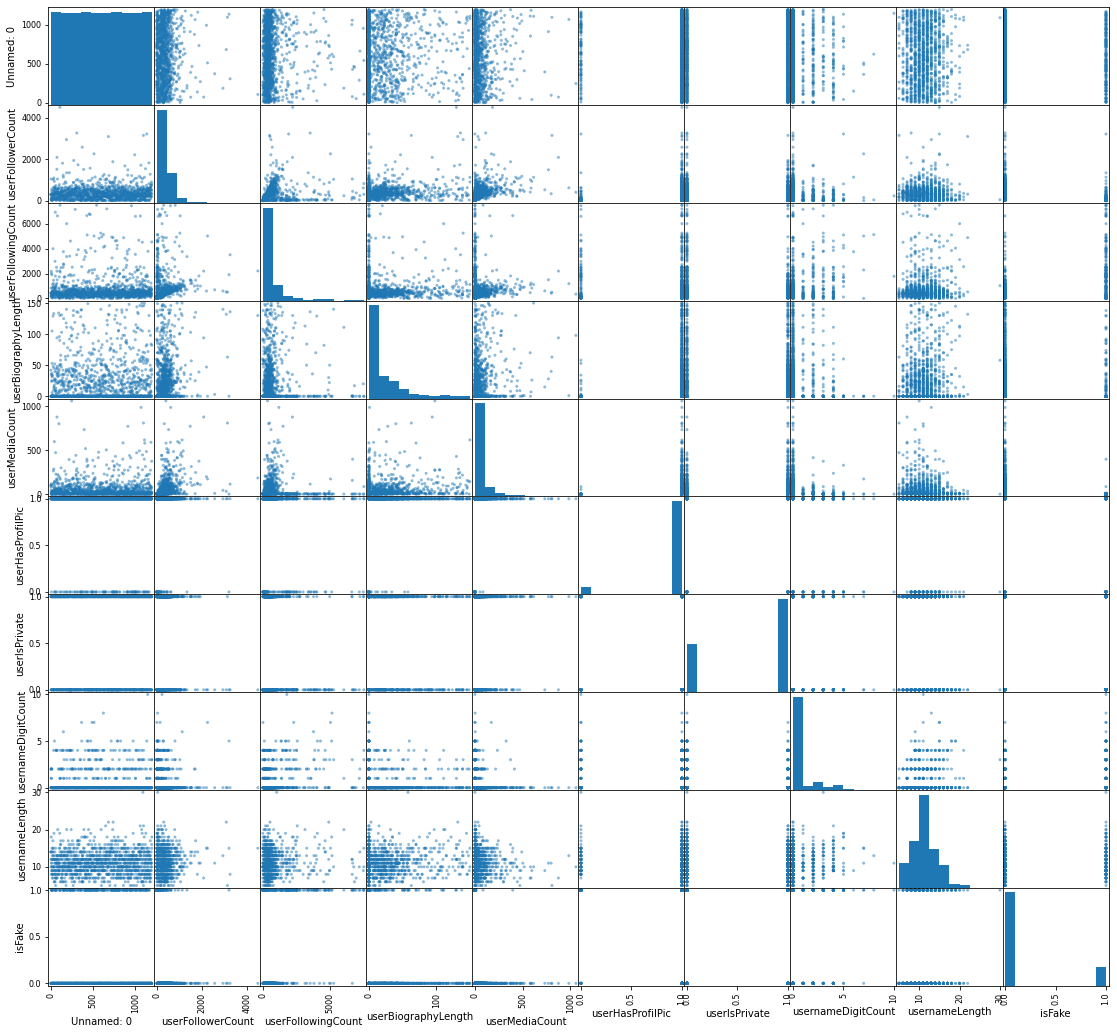

In [ ]:
# Scatterplot Matrix
# Like the Correlation Matrix Plot, the scatterplot matrix is symmetrical. This is useful to look at the pair-wise relationships from different perspectives. Because there is 
# little point of drawing a scatterplot of each variable with itself, the diagonal shows histograms of each attribute.

scatter_matrix(df,figsize=[19,18])
plt.show()

                     userFollowerCount  ...  usernameLength
userFollowerCount             1.000000  ...        0.022411
userFollowingCount            0.114649  ...        0.065600
userBiographyLength           0.248949  ...        0.090291
userMediaCount                0.389402  ...       -0.112404
userHasProfilPic              0.188114  ...       -0.068743
userIsPrivate                -0.004220  ...       -0.105001
usernameDigitCount           -0.111807  ...        0.111329
usernameLength                0.022411  ...        1.000000

[8 rows x 8 columns]


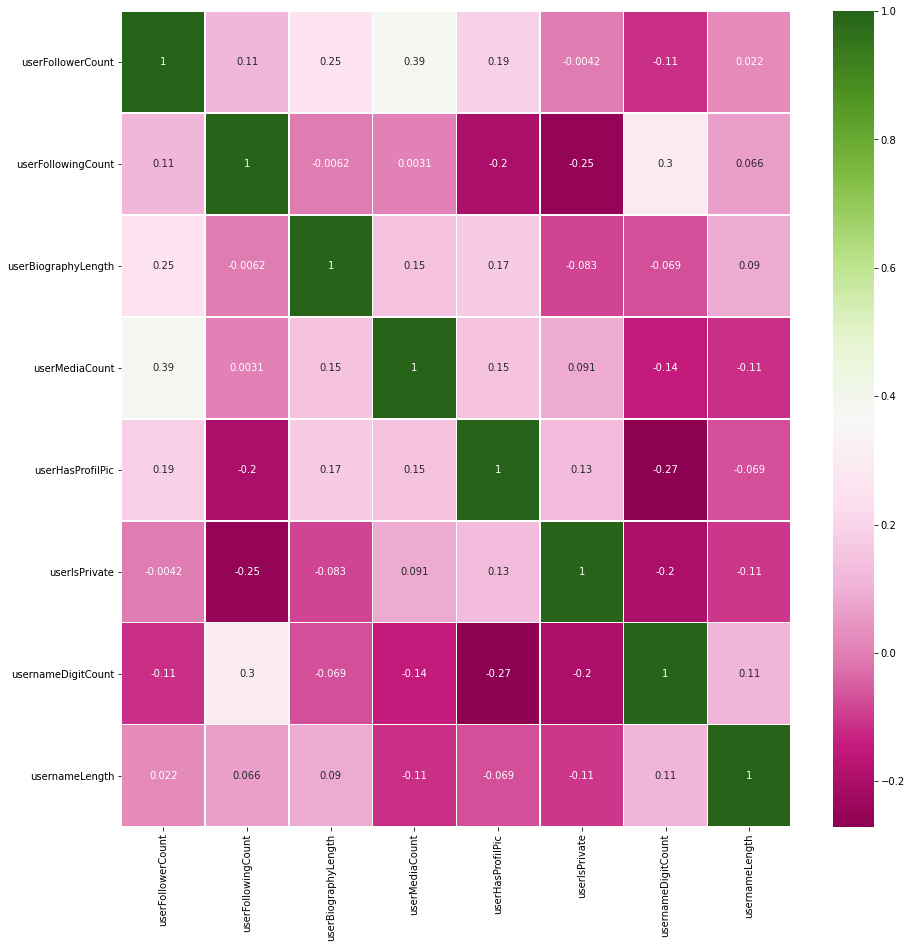

In [ ]:
# A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. In our case, the green shows very strong correlations. The diagonal 
# line is the correlation of the variables to themselves — so they’ll obviously be 1.

plt.rcParams["figure.figsize"]=(15,15)
corrmatrix1=df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']].corr(method='pearson')
print(corrmatrix1)
sns.heatmap(corrmatrix1, xticklabels=corrmatrix1.columns,
            yticklabels=corrmatrix1.columns,
            cmap='PiYG',
            annot=True,
            linewidth=0.5)
plt.show()

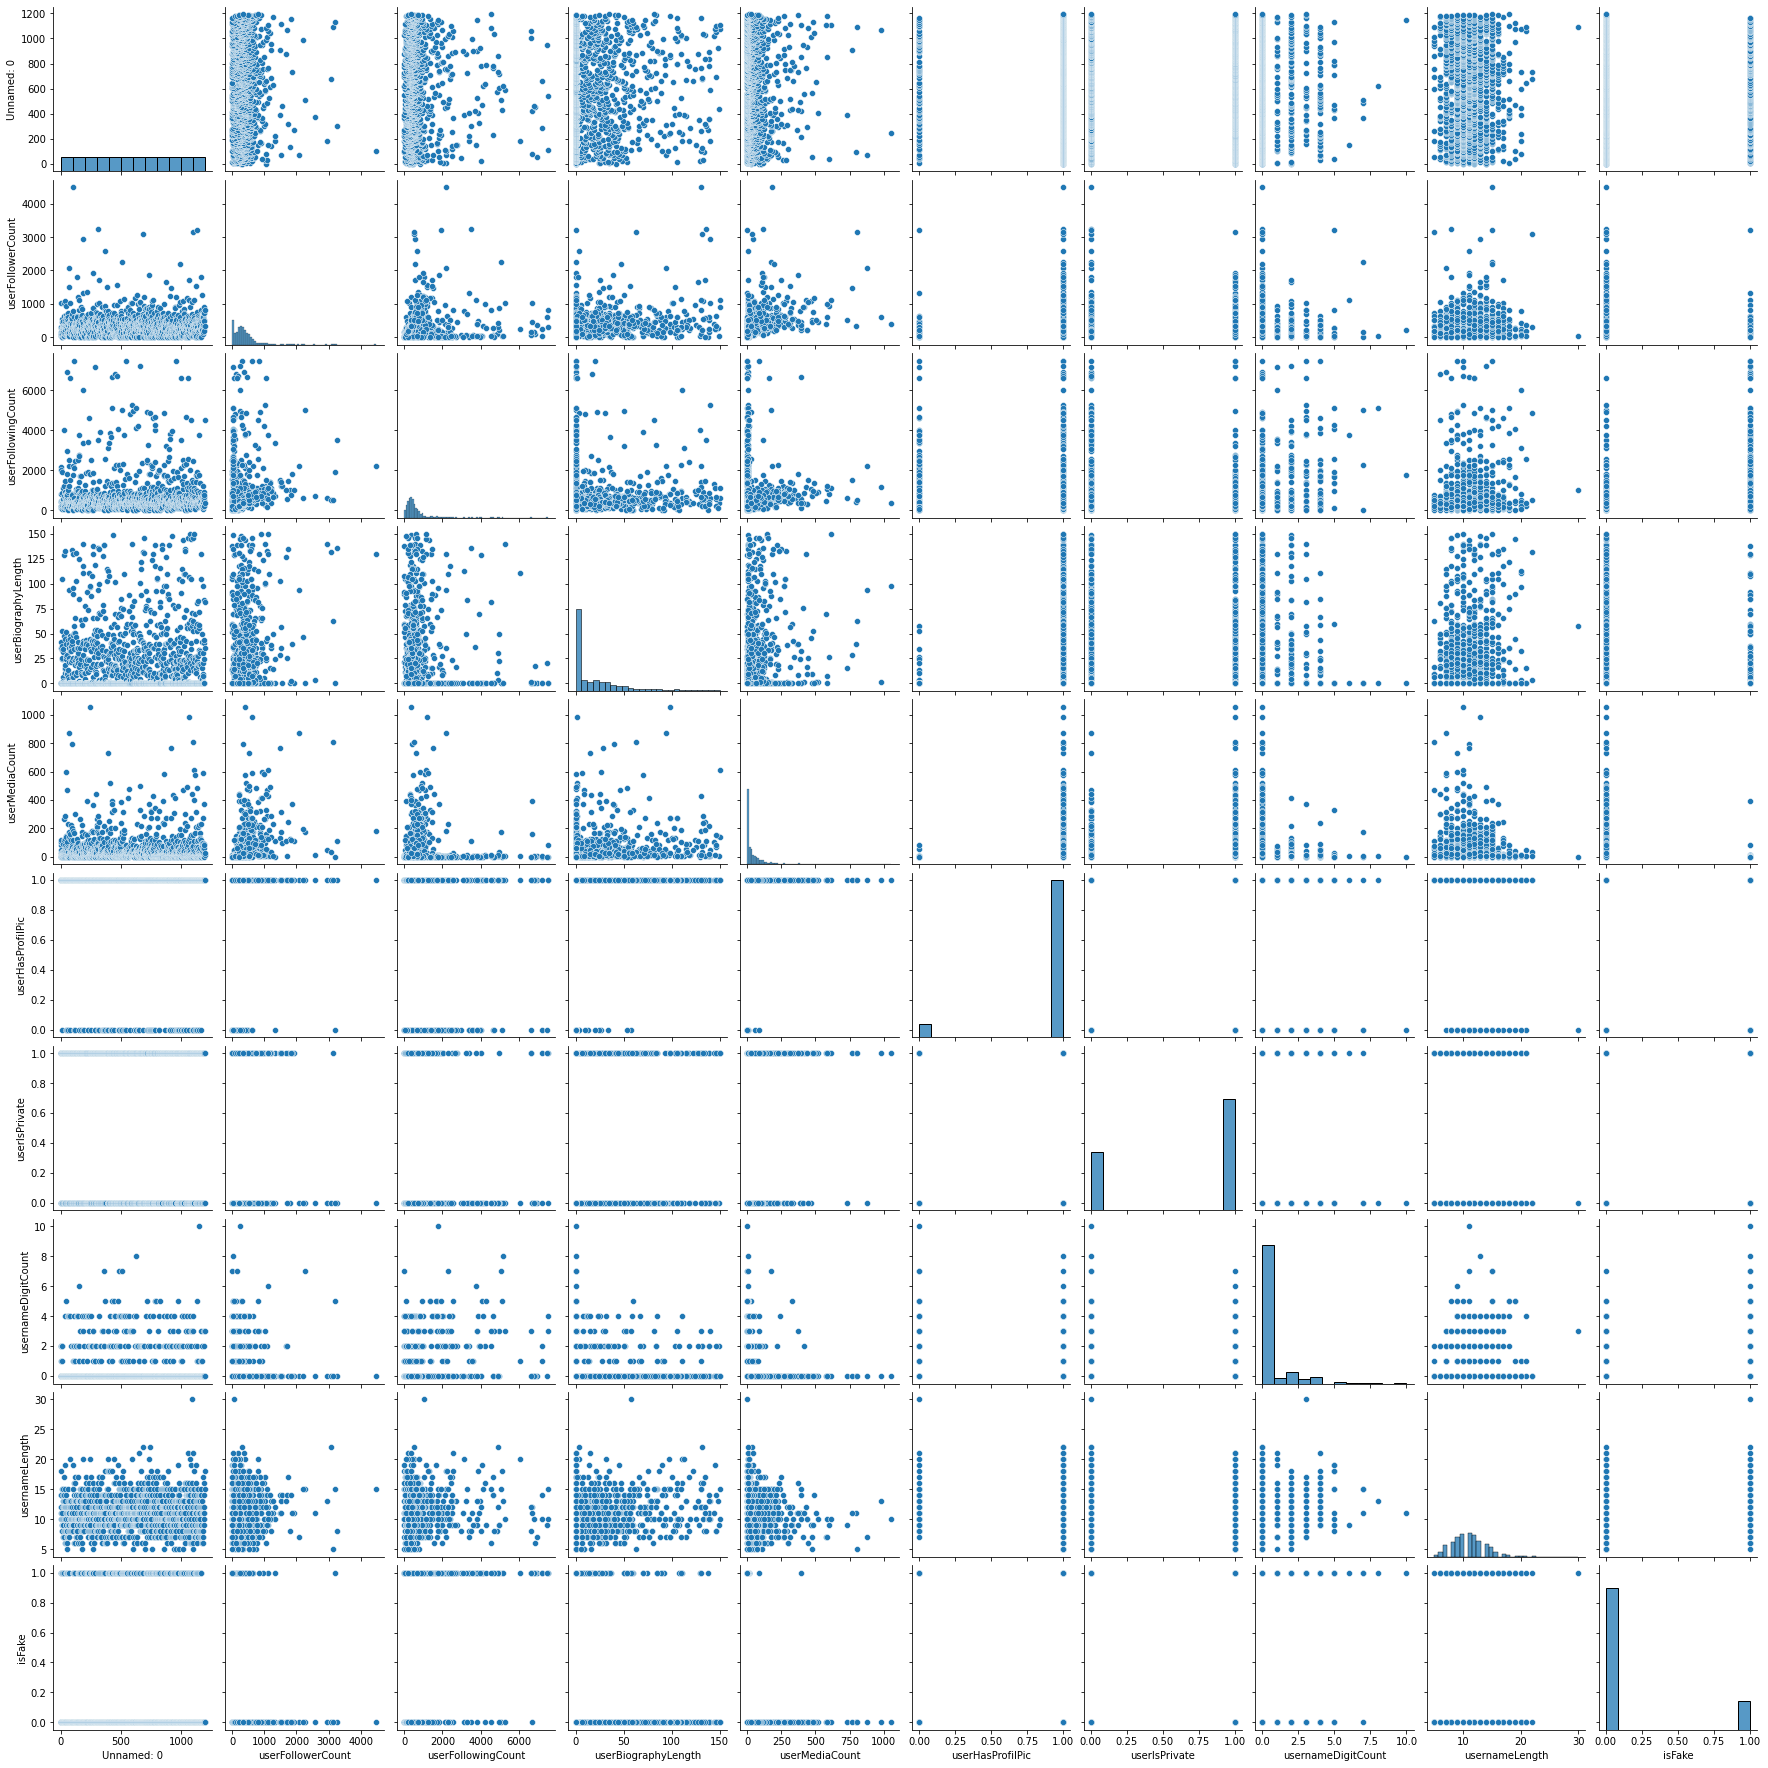

In [ ]:
# seaborn, which is another Python data visualization library that makes it easier to create beautiful visualizations using 
# matplotlib.

sns.pairplot(df)

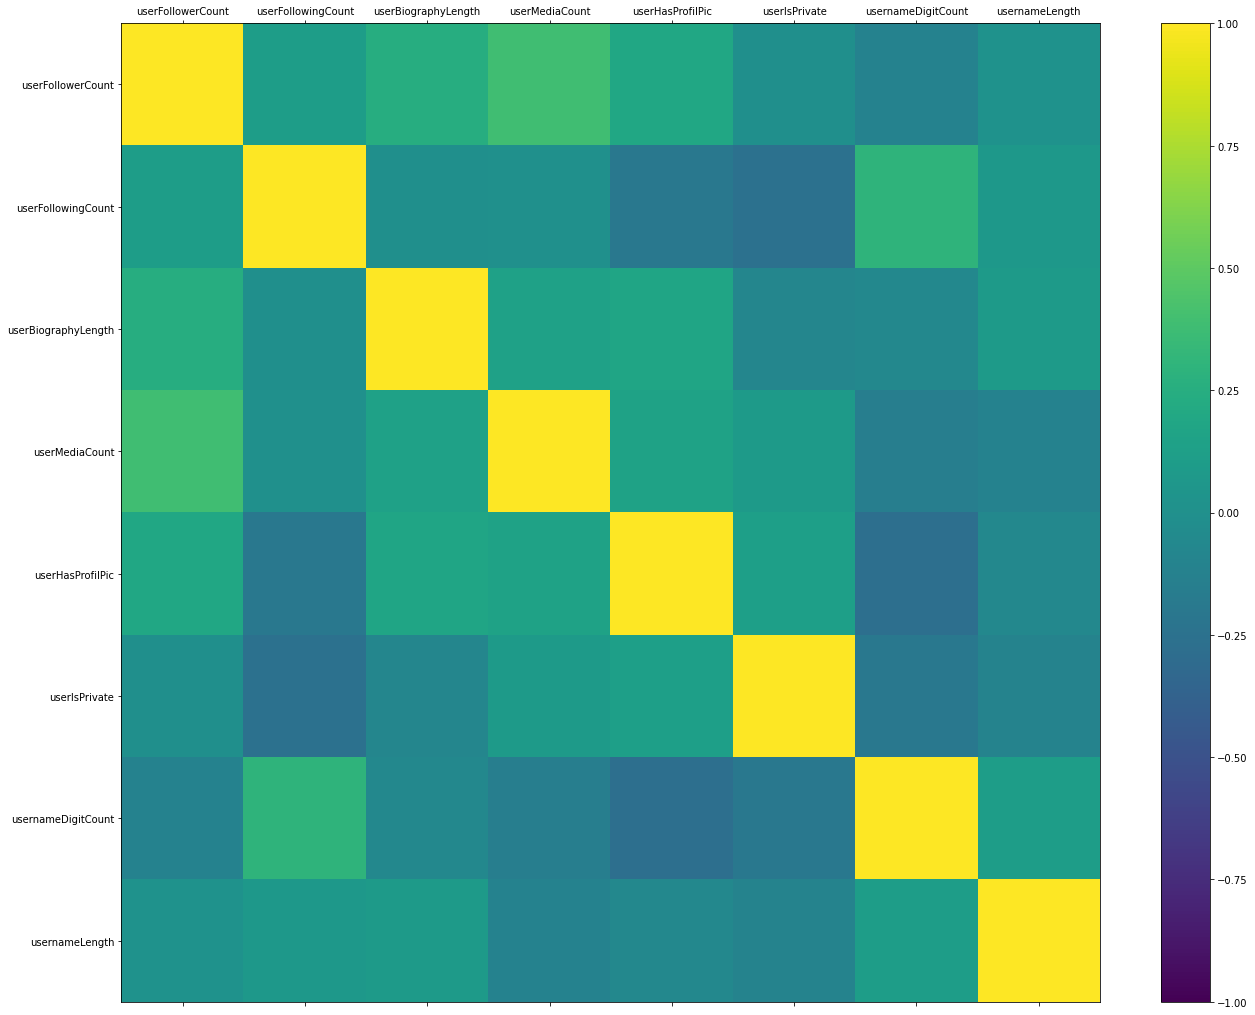

In [ ]:
# We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly 
# positively correlated with each other (as you would expected) in the diagonal line from top left to bottom right.

# Correction Matrix Plot
names = ['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']
correlations = df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']].corr()
# plot correlation matrix
fig = plt.figure(figsize = [22,18])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [ ]:
# Normalize the dataset
# we create a scaler object.Then we fit the scaler parameters i.e we calculate the minimum and maximum value for each feature. Finally ,we transform the data using those parameters.

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
df


Unnamed: 0  userFollowerCount  ...  usernameLength  isFake
0       0.000000           0.061888  ...            0.36     0.0
1       0.000838           0.068566  ...            0.36     0.0
2       0.001676           0.065227  ...            0.28     0.0
3       0.002515           0.230410  ...            0.20     0.0
4       0.003353           0.013357  ...            0.36     0.0
...          ...                ...  ...             ...     ...
1189    0.996647           0.043633  ...            0.20     0.0
1190    0.997485           0.163624  ...            0.24     0.0
1191    0.998324           0.109305  ...            0.44     0.0
1192    0.999162           0.178317  ...            0.40     0.0
1193    1.000000           0.074132  ...            0.52     0.0

[1194 rows x 10 columns]

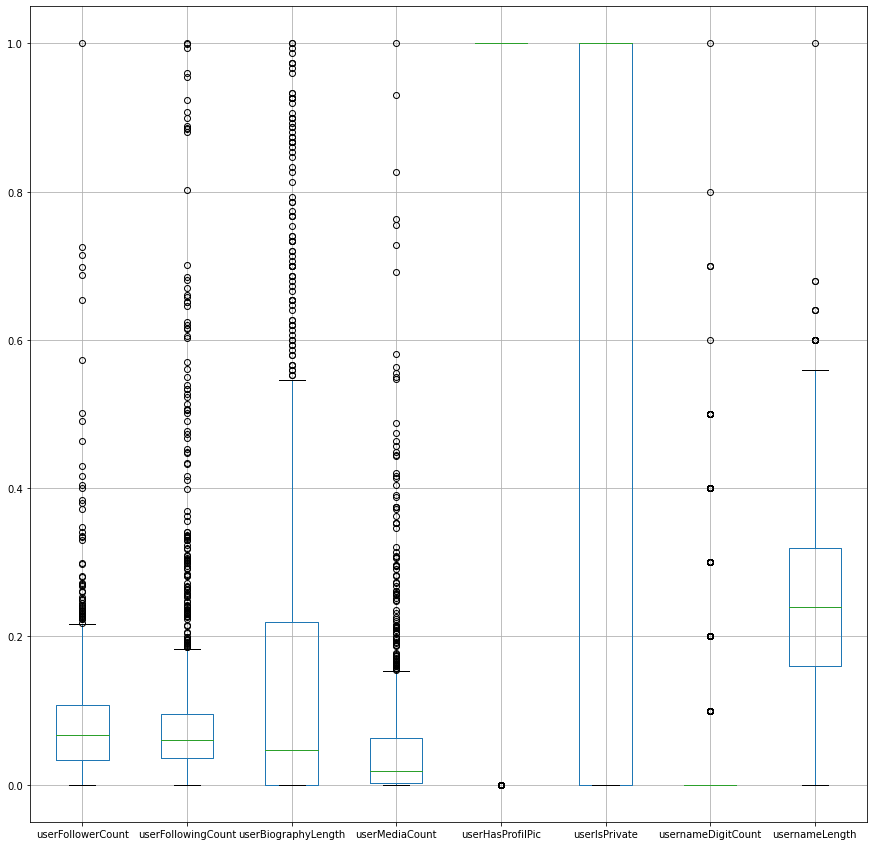

In [ ]:
# Boxplot of normalised dataset

bp=pd.DataFrame(data=df,columns = ['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength'])
bp.boxplot()

# Automated and Non-Automated Account Dataset


In [ ]:
link='https://drive.google.com/file/d/1Lnvan9E5xX_xbklcTiAPldgj7-o8SmnS/view?usp=sharing'

# to get the id part of the file 
id = link.split("/")[-2] 

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('automatedAccountData.csv') 

df_automatedAccount = pd.read_csv('automatedAccountData.csv')
print(df_automatedAccount)


     userMediaCount  ... automatedBehaviour
0                97  ...                  1
1               863  ...                  1
2               149  ...                  1
3                33  ...                  1
4              1000  ...                  1
..              ...  ...                ...
695             145  ...                  1
696              49  ...                  1
697            1000  ...                  1
698             173  ...                  1
699             883  ...                  1

[700 rows x 16 columns]


In [ ]:
link='https://drive.google.com/file/d/1fN3V-BMKLTtQLn_kFTZQF1fHYoeN1BMD/view?usp=sharing'

# to get the id part of the file 
id = link.split("/")[-2] 

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('nonautomatedAccountData.csv') 

df_nonautomatedAccount = pd.read_csv('nonautomatedAccountData.csv')
print(df_nonautomatedAccount)


     userMediaCount  ... automatedBehaviour
0               138  ...                  0
1               211  ...                  0
2               300  ...                  0
3               139  ...                  0
4                35  ...                  0
..              ...  ...                ...
695              26  ...                  0
696              12  ...                  0
697              11  ...                  0
698             116  ...                  0
699               1  ...                  0

[700 rows x 16 columns]


In [ ]:
df1 = pd.concat([df_automatedAccount, df_nonautomatedAccount], axis = 0)
df1 = df1.sample(frac = 1).reset_index(drop = True)
df1.head(10)

userMediaCount  ... automatedBehaviour
0              16  ...                  1
1              12  ...                  1
2              46  ...                  0
3              96  ...                  0
4               0  ...                  0
5               0  ...                  0
6             676  ...                  1
7             645  ...                  1
8              30  ...                  1
9             127  ...                  0

[10 rows x 16 columns]

In [ ]:
#summary or statistical information of the dataset

df1.describe()

userMediaCount  ...  automatedBehaviour
count     1400.000000  ...         1400.000000
mean       172.925714  ...            0.500000
std        251.258929  ...            0.500179
min          0.000000  ...            0.000000
25%         21.000000  ...            0.000000
50%         63.000000  ...            0.500000
75%        197.500000  ...            1.000000
max       1000.000000  ...            1.000000

[8 rows x 10 columns]

In [ ]:
df1.isnull().sum()

userMediaCount              0
mediaLikeNumbers            0
mediaCommentNumbers         0
mediaCommentsAreDisabled    0
mediaHashtagNumbers         0
mediaUploadTimes            0
mediaHasLocationInfo        0
userFollowerCount           0
userFollowingCount          0
userHasHighlighReels        0
userHasExternalUrl          0
userTagsCount               0
userBiographyLength         0
usernameLength              0
usernameDigitCount          0
automatedBehaviour          0
dtype: int64

In [ ]:
#number of rows and columns

rows = len(df1.axes[0])
cols = len(df1.axes[1])
print(rows)
print(cols)

1400
16


In [ ]:
df1.columns

Index(['userMediaCount', 'mediaLikeNumbers', 'mediaCommentNumbers',
       'mediaCommentsAreDisabled', 'mediaHashtagNumbers', 'mediaUploadTimes',
       'mediaHasLocationInfo', 'userFollowerCount', 'userFollowingCount',
       'userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount',
       'userBiographyLength', 'usernameLength', 'usernameDigitCount',
       'automatedBehaviour'],
      dtype='object')

In [ ]:
df1.rank()

userMediaCount  mediaLikeNumbers  ...  usernameDigitCount  automatedBehaviour
0              294.5             405.0  ...               616.5              1050.5
1              242.0             610.0  ...               616.5              1050.5
2              584.0            1064.0  ...               616.5               350.5
3              836.0            1329.0  ...               616.5               350.5
4               27.0            1374.0  ...               616.5               350.5
...              ...               ...  ...                 ...                 ...
1395           584.0            1156.0  ...               616.5              1050.5
1396          1022.0            1228.0  ...               616.5               350.5
1397          1175.5             433.0  ...               616.5              1050.5
1398           548.5             922.0  ...               616.5               350.5
1399           690.0             962.0  ...               616.5               350.5

[1400 rows x 16 columns]

In [ ]:
df1.corr()

userMediaCount  ...  automatedBehaviour
userMediaCount              1.000000  ...            0.359644
userFollowerCount           0.071639  ...           -0.005243
userFollowingCount          0.421409  ...            0.582650
userHasHighlighReels        0.272368  ...            0.297381
userHasExternalUrl          0.386260  ...            0.522146
userTagsCount               0.058818  ...           -0.024146
userBiographyLength         0.374890  ...            0.665720
usernameLength              0.075585  ...            0.293675
usernameDigitCount         -0.018931  ...            0.060846
automatedBehaviour          0.359644  ...            1.000000

[10 rows x 10 columns]

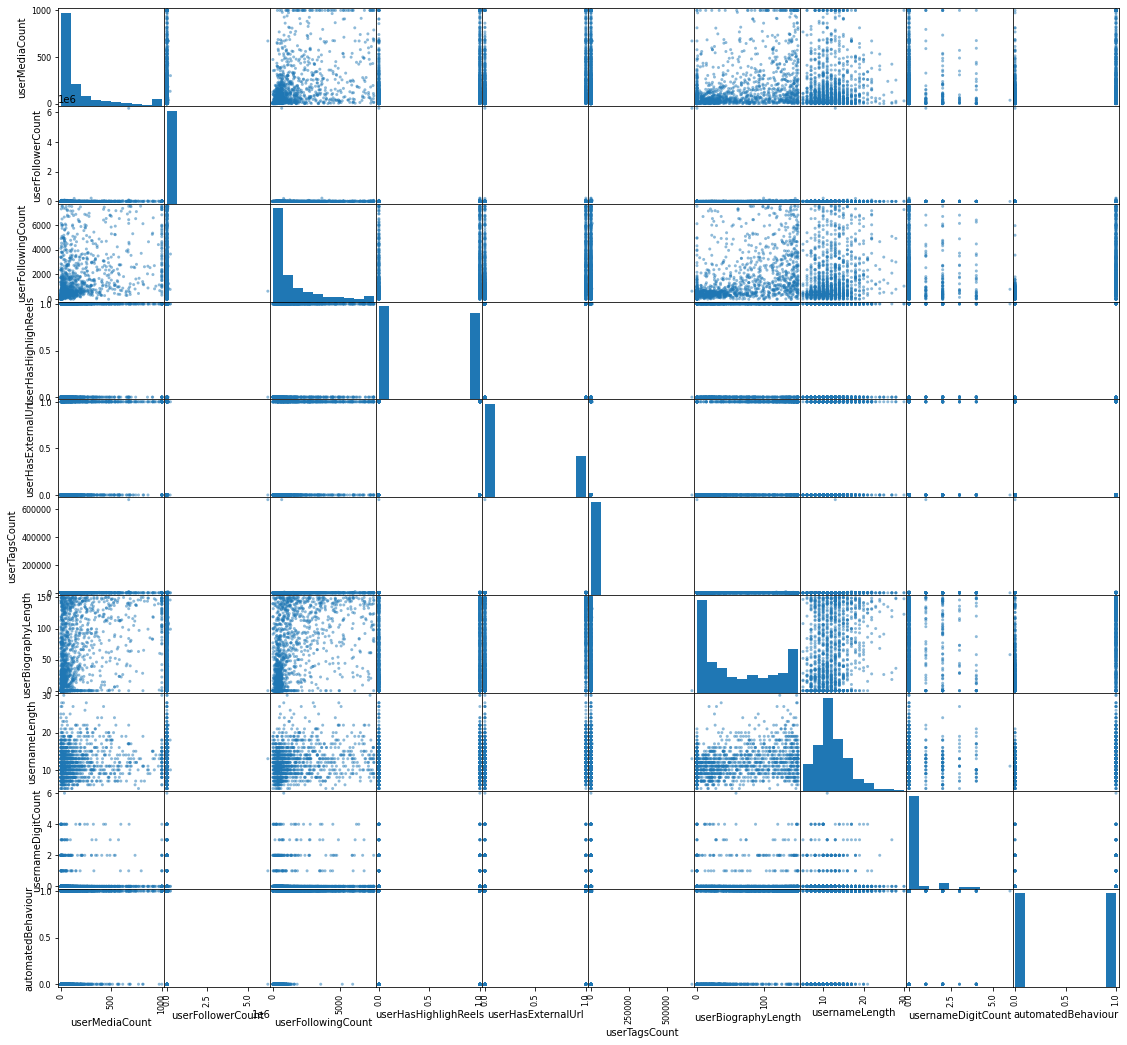

In [ ]:
# Scatterplot Matrix
# Like the Correlation Matrix Plot, the scatterplot matrix is symmetrical. This is useful to look at the pair-wise relationships from different perspectives. Because there is 
# little point of drawing a scatterplot of each variable with itself, the diagonal shows histograms of each attribute.

scatter_matrix(df1,figsize=[19,18])
plt.show()

                      userMediaCount  ...  usernameDigitCount
userMediaCount              1.000000  ...           -0.018931
userFollowerCount           0.071639  ...            0.020821
userFollowingCount          0.421409  ...            0.010082
userHasHighlighReels        0.272368  ...           -0.024711
userHasExternalUrl          0.386260  ...           -0.026609
userTagsCount               0.058818  ...            0.023180
userBiographyLength         0.374890  ...            0.021754
usernameLength              0.075585  ...           -0.014255
usernameDigitCount         -0.018931  ...            1.000000

[9 rows x 9 columns]


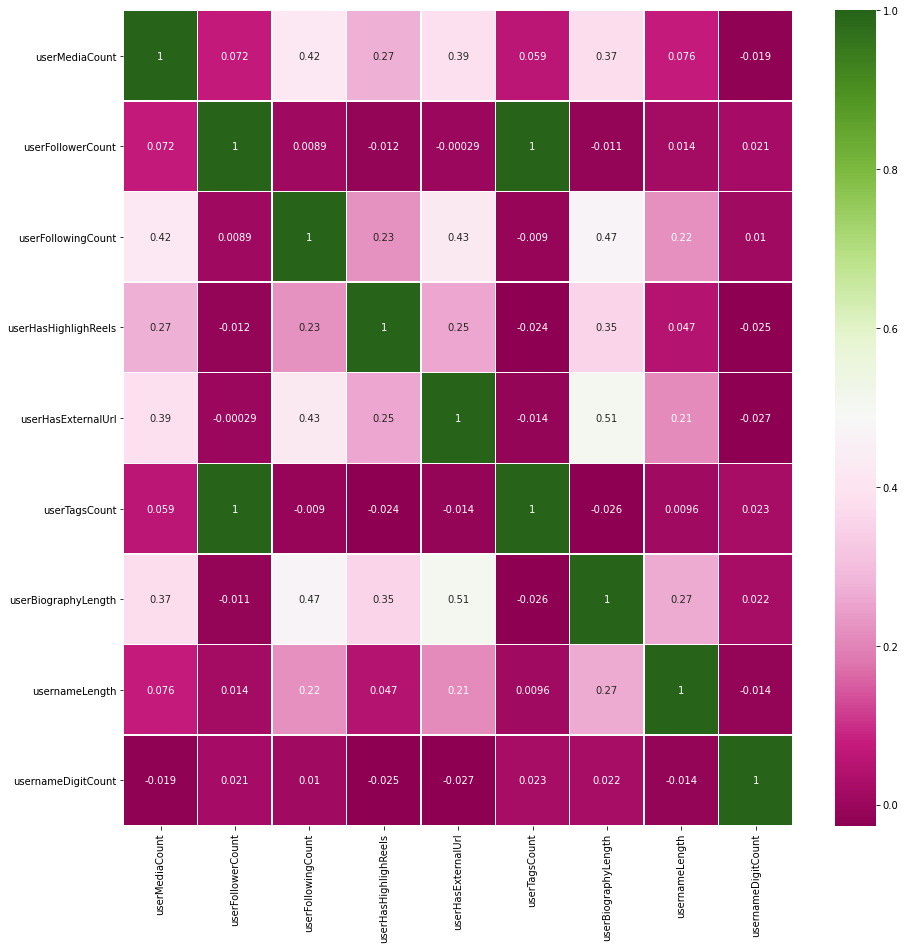

In [ ]:
# A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. In our case, the green shows very strong correlations. The diagonal 
# line is the correlation of the variables to themselves — so they’ll obviously be 1.

plt.rcParams["figure.figsize"]=(15,15)
corrmatrix1=df1[['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']].corr(method='pearson')
print(corrmatrix1)
sns.heatmap(corrmatrix1, xticklabels=corrmatrix1.columns,
            yticklabels=corrmatrix1.columns,
            cmap='PiYG',
            annot=True,
            linewidth=0.5)
plt.show()

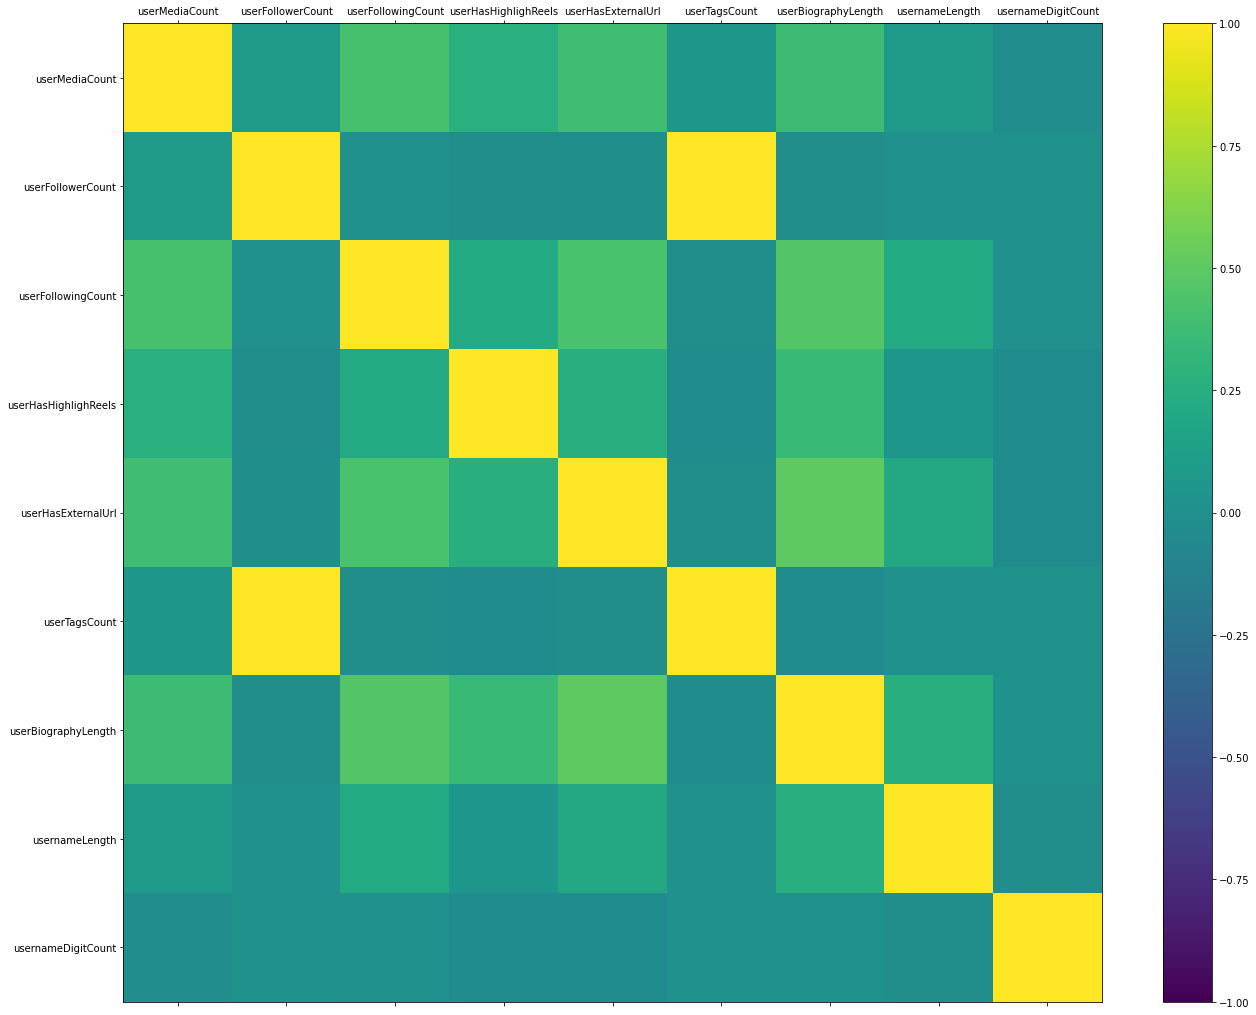

In [ ]:
# We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as the top right. This is useful as we can see two different views on the same data in one plot. We can also see that each variable is perfectly 
# positively correlated with each other (as you would expected) in the diagonal line from top left to bottom right.

# Correction Matrix Plot
names = ['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']
correlations = df1[['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']].corr()
# plot correlation matrix
fig = plt.figure(figsize = [22,18])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Logistic Regression On Normalised Dataset For Fake Account Detection

Accuracy   :  0.9080779944289693
Precision  :  0.9777777777777777
Recall     :  0.5789473684210527
F1 Score   :  0.7272727272727273


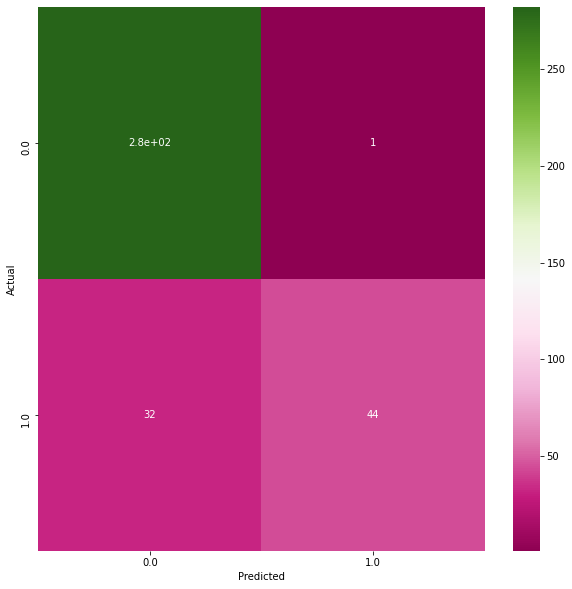

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
plt.rcParams["figure.figsize"]=(10,10)

X = df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']]
y = df['isFake']

# divide the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# apply logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, cmap='PiYG', annot=True)

# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))
plt.show()

# Logistic Regression On Normalised Dataset For Automated Account Detection

Accuracy   :  0.8928571428571429
Precision  :  0.8872549019607843
Recall     :  0.8916256157635468
F1 Score   :  0.8894348894348895


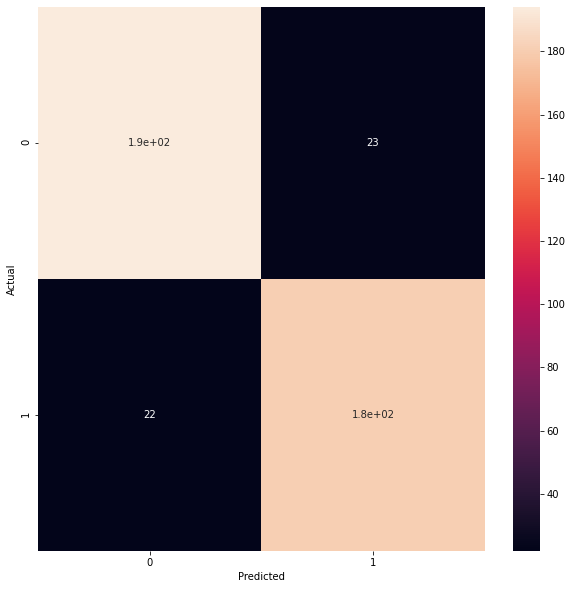

In [ ]:
plt.rcParams["figure.figsize"]=(10,10)
scaler = MinMaxScaler()
X=df1[['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']]
X = pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 
y = df1['automatedBehaviour']
# divide the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# apply logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# to find accuracy,precision,recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))
plt.show()

# Naive Bayes On Normalised Dataset For Fake Account Detection

In [ ]:
from sklearn.naive_bayes import GaussianNB

X = df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']]
y = df['isFake']

# divide the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# apply naive bayes 
GausNB = GaussianNB()
GausNB.fit(X_train,y_train)
print(GausNB)

y_pred = GausNB.predict(X_test)
accuracy =  metrics.accuracy_score(y_test,y_pred)
print("Accuracy  ->" , accuracy)
print('Precision ->',metrics.precision_score(y_test, y_pred))
print('Recall    ->',metrics.recall_score(y_test, y_pred))
print('F1 Score  ->',metrics.f1_score(y_test, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy  -> 0.9164345403899722
Precision -> 0.8285714285714286
Recall    -> 0.7631578947368421
F1 Score  -> 0.7945205479452055


# Naive Bayes On Normalised Dataset For Automated Account Detection

In [ ]:
X=df1[['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']]
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index) 
y = df1['automatedBehaviour']

# divide the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# apply naive bayes
GausNB = GaussianNB()
GausNB.fit(X_train,y_train)
print(GausNB)

y_pred = GausNB.predict(X_test)
accuracy =  metrics.accuracy_score(y_test,y_pred)
print("Accuracy ->" , accuracy)
print('Precision ->',metrics.precision_score(y_test, y_pred))
print('Recall    ->',metrics.recall_score(y_test, y_pred))
print('F1 Score  ->',metrics.f1_score(y_test, y_pred))


GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy -> 0.669047619047619
Precision -> 0.5958083832335329
Recall    -> 0.9802955665024631
F1 Score  -> 0.7411545623836127


## Support Vector Machine Classifier for Fake Account Detection

Accuracy   :  0.9164345403899722
Precision  :  0.9423076923076923
Recall     :  0.6447368421052632
F1 Score   :  0.765625


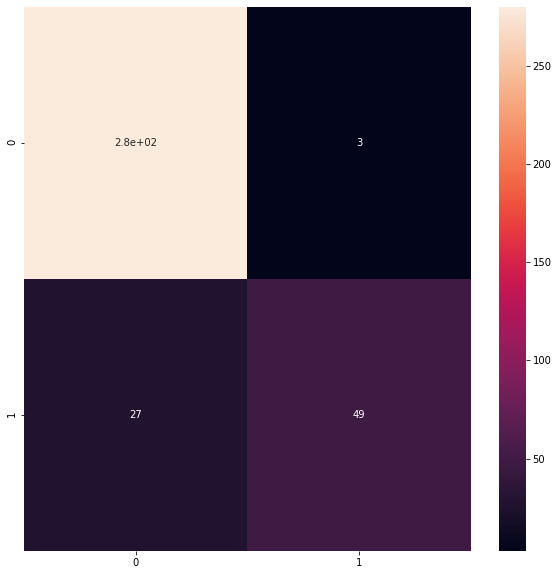

In [ ]:
from sklearn import svm

X = df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']]
y = df['isFake']

#divide the dataset into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

#apply SVM classifier
classifier = svm.SVC(kernel='linear', C=1.0, gamma = 'auto')
classifier.fit(X_train,y_train)

#predict target variable with model
y_pred = classifier.predict(X_test)

#finding confusion matrix and accuracy score
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))
plt.show()

## Support Vector Machine Classifier for Automated Account Detection

Accuracy   :  0.9023809523809524
Precision  :  0.8894230769230769
Recall     :  0.9113300492610837
F1 Score   :  0.900243309002433


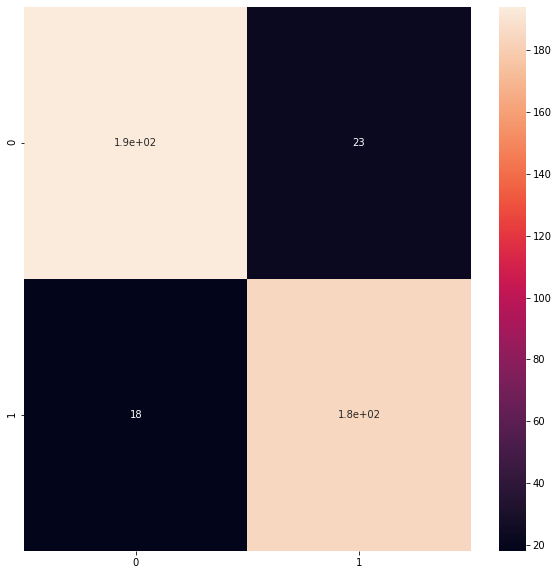

In [ ]:
from sklearn import svm

X=df1[['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']]
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index) 
y = df1['automatedBehaviour']

# divide the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

#apply SVM classifier
classifier = svm.SVC(kernel='linear', C=1.0, gamma = 'auto')
classifier.fit(X_train,y_train)

#predict target variable with model
y_pred = classifier.predict(X_test)

#finding confusion matrix and accuracy score
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))
plt.show()

## Decision Tree Classifier for Fake Account Detection

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#split dataset in features and target variable 

feature_cols = ['userFollowerCount', 'userFollowingCount',
       'userBiographyLength', 'userMediaCount', 'userHasProfilPic',
       'userIsPrivate', 'usernameDigitCount', 'usernameLength']
X = df[feature_cols] # Features
y = df.isFake  # Target variable

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Accuracy   :  0.935933147632312
Precision  :  0.8518518518518519
Recall     :  0.7540983606557377
F1 Score   :  0.7999999999999999


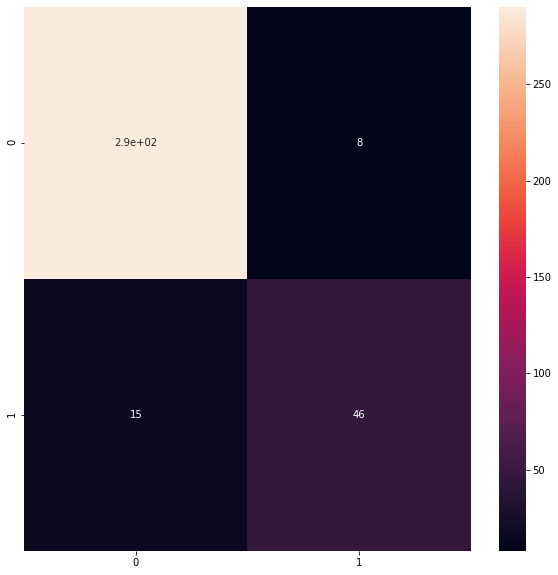

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

#finding confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


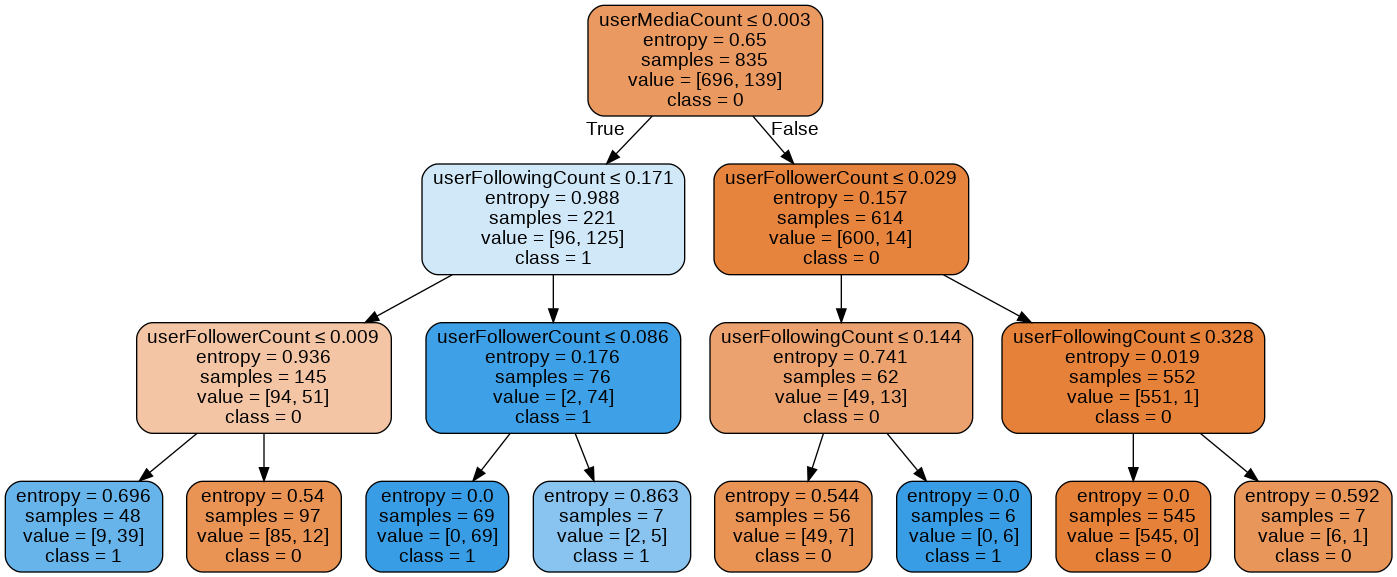

In [ ]:
#Visualizing Decision Trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fakeaccount.png')
Image(graph.create_png())


## Decision Tree Classifier For Automated Account Dataset

In [ ]:
#split dataset in features and target variable 

feature_cols = ['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']
X = df1[feature_cols] # Features
y = df1.automatedBehaviour # Target variable

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Accuracy   :  0.919047619047619
Precision  :  0.9481865284974094
Recall     :  0.8840579710144928
F1 Score   :  0.9149999999999999


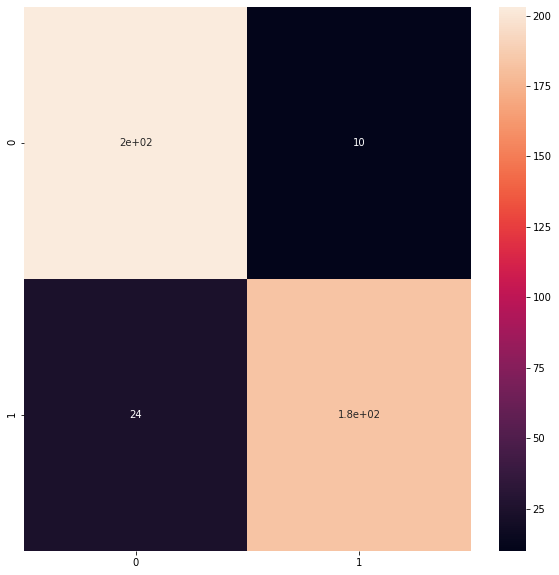

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

#finding confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

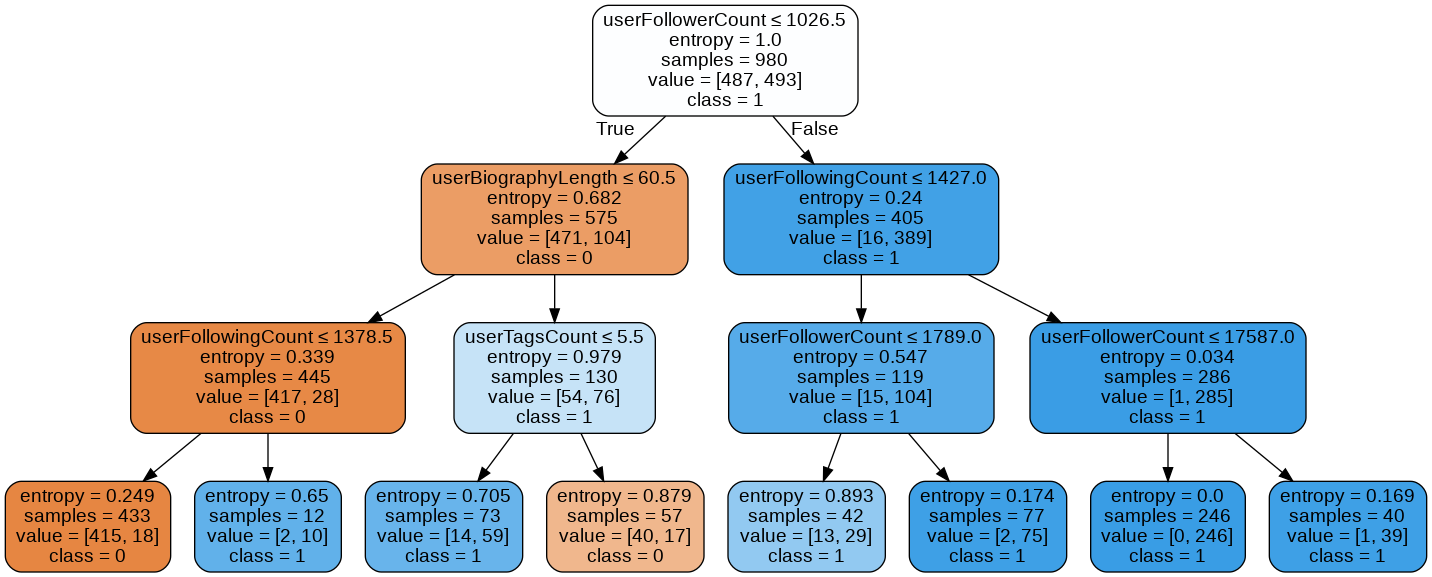

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('automatedaccount.png')
Image(graph.create_png())

# K-Nearest Neighbor(KNN) Classification For Fake Account Dataset

Accuracy   :  0.924791086350975
Precision  :  0.9016393442622951
Recall     :  0.7236842105263158
F1 Score   :  0.802919708029197


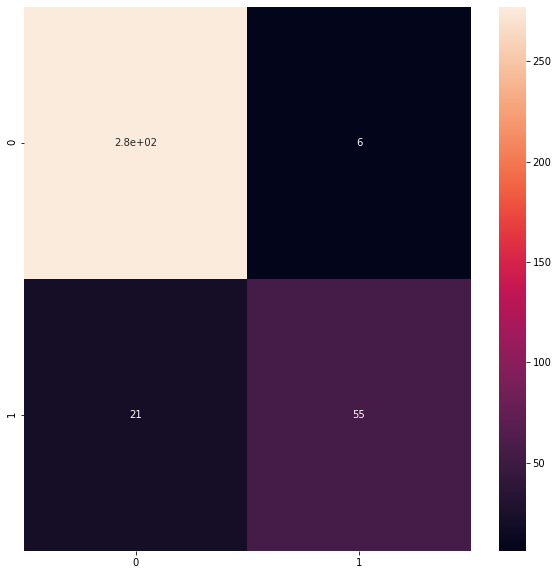

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


X = df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']]
y = df['isFake']

#divide the dataset into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics

# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))


#finding confusion matrix and accuracy score
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()



# K-Nearest Neighbor(KNN) Classification For Automated Account Dataset

Accuracy   :  0.8738095238095238
Precision  :  0.8787878787878788
Recall     :  0.8571428571428571
F1 Score   :  0.8678304239401495


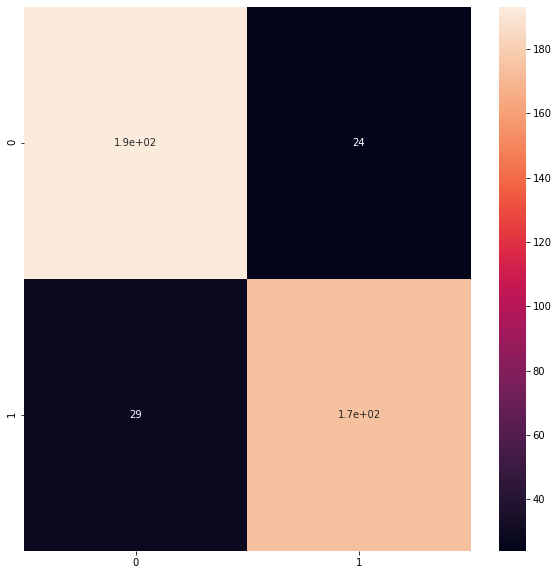

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X=df1[['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']]
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index) 
y = df1['automatedBehaviour']

#divide the dataset into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics

# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

#finding confusion matrix and accuracy score
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()



# Random Forest Classifier for Fake Account Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Accuracy   :  0.9610027855153204
Precision  :  0.9078947368421053
Recall     :  0.9078947368421053
F1 Score   :  0.9078947368421053


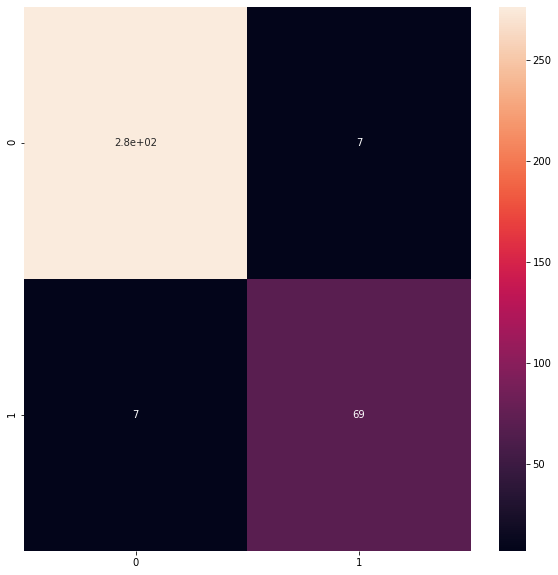

In [ ]:
# Split dataset into training set and test set
X = df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']]
y = df['isFake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

#finding confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

# Random Forest Classifier for Automated Account Dataset

Accuracy   :  0.9476190476190476
Precision  :  0.9289099526066351
Recall     :  0.9655172413793104
F1 Score   :  0.9468599033816426


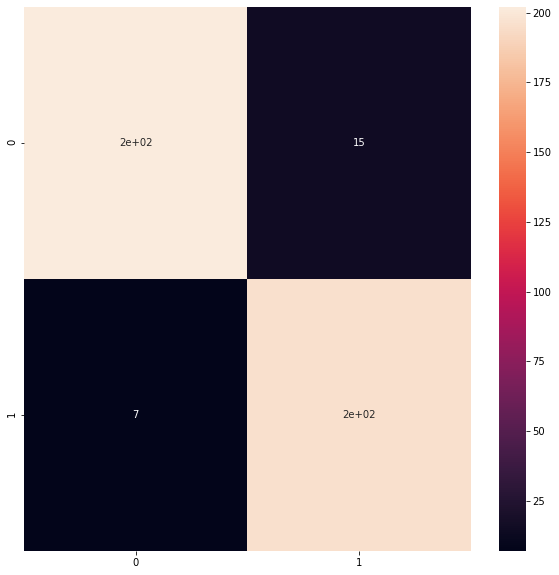

In [ ]:
# Split dataset into training set and test set
X = df1[['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']]
y = df1['automatedBehaviour']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

#finding confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()




# AdaBoost Algorithm for Fake Account Detection

In [ ]:
# Split dataset into training set and test set
X = df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']]
y = df['isFake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

Accuracy   :  0.958217270194986
Precision  :  0.9066666666666666
Recall     :  0.8947368421052632
F1 Score   :  0.9006622516556291


# AdaBoost Algorithm for Automated Account Detection

In [ ]:
scaler = MinMaxScaler()
X=df1[['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']]
X = pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 
y = df1['automatedBehaviour']
# divide the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
# to find accuracy, precision, recall and f1-score
print('Accuracy   : ',metrics.accuracy_score(y_test, y_pred))
print('Precision  : ',metrics.precision_score(y_test, y_pred))
print('Recall     : ',metrics.recall_score(y_test, y_pred))
print('F1 Score   : ',metrics.f1_score(y_test, y_pred))

Accuracy   :  0.930952380952381
Precision  :  0.910377358490566
Recall     :  0.9507389162561576
F1 Score   :  0.9301204819277108


# BAGGING DECISION TREE ON FAKE ACCOUNT DATASET

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: 0 Accuracy is: 0.9642857142857143
Model: 1 Accuracy is: 0.9523809523809523
Model: 2 Accuracy is: 0.9642857142857143
Model: 3 Accuracy is: 0.9285714285714286
Model: 4 Accuracy is: 0.9642857142857143
Model: 5 Accuracy is: 0.963855421686747
Model: 6 Accuracy is: 0.963855421686747
Model: 7 Accuracy is: 1.0
Model: 8 Accuracy is: 0.963855421686747
Model: 9 Accuracy is: 0.9759036144578314
Mean Accuracy is: 0.9641279403327596

Accuracy   : 95.26462395543176
Precision  :  0.9230769230769231
Recall     :  0.7868852459016393
F1 Score   :  0.8495575221238939


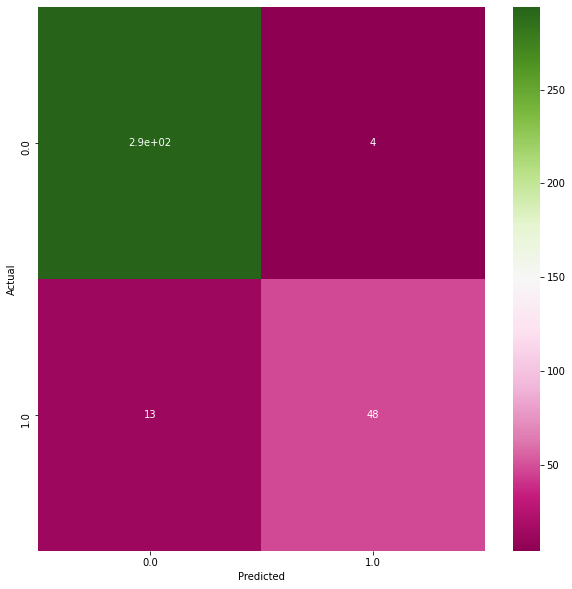

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X = df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']]
y = df['isFake']

# divide the dataset into training and testing
X_fit, X_eval, y_fit, y_test= model_selection.train_test_split( X, y, test_size=0.30, random_state=1 )

# Create random sub sample to train multiple models
seed = 8
kfold = model_selection.KFold(n_splits=10, random_state=seed)

# Define a decision tree classifier
cart = DecisionTreeClassifier()
num_trees = 100

# Create classification model for bagging
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

# Train different models and print their accuracy
results = model_selection.cross_val_score(model, X_fit, y_fit,cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+str(results[i]))

# print mean accuracy
print("Mean Accuracy is: "+str(results.mean()))

#accuracy
model.fit(X_fit, y_fit)
pred_label = model.predict(X_eval)
nnz = np.shape(y_test)[0] - np.count_nonzero(pred_label - y_test)
acc = 100*nnz/np.shape(y_test)[0]
print('\nAccuracy   : '+str(acc))
print('Precision  : ',metrics.precision_score(y_test, pred_label))
print('Recall     : ',metrics.recall_score(y_test, pred_label))
print('F1 Score   : ',metrics.f1_score(y_test, pred_label))

confusion_matrix = pd.crosstab(y_test, pred_label, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, cmap='PiYG', annot=True)



# BAGGING DECISION TREE ON AUTOMATED ACCOUNT DATASET

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: 0 Accuracy is: 0.9489795918367347
Model: 1 Accuracy is: 0.9183673469387755
Model: 2 Accuracy is: 0.9285714285714286
Model: 3 Accuracy is: 0.9183673469387755
Model: 4 Accuracy is: 0.9693877551020408
Model: 5 Accuracy is: 0.8979591836734694
Model: 6 Accuracy is: 0.9285714285714286
Model: 7 Accuracy is: 0.9183673469387755
Model: 8 Accuracy is: 0.9387755102040817
Model: 9 Accuracy is: 0.9387755102040817
Mean Accuracy is: 0.9306122448979591

Accuracy   : 94.52380952380952
Precision  :  0.9554455445544554
Recall     :  0.9323671497584541
F1 Score   :  0.9437652811735942


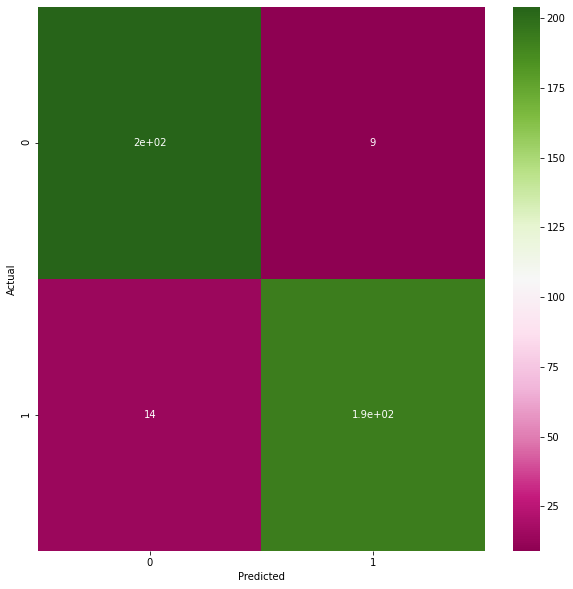

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X = df1[['userMediaCount', 'userFollowerCount', 'userFollowingCount','userHasHighlighReels', 'userHasExternalUrl', 'userTagsCount','userBiographyLength', 'usernameLength', 'usernameDigitCount']]
y = df1['automatedBehaviour']

# divide the dataset into training and testing
X_fit, X_eval, y_fit, y_test= model_selection.train_test_split( X, y, test_size=0.30, random_state=1 )

# Create random sub sample to train multiple models
seed = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed)

# Define a decision tree classifier
cart = DecisionTreeClassifier()
num_trees = 100

# Create classification model for bagging
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

# Train different models and print their accuracy
results = model_selection.cross_val_score(model, X_fit, y_fit,cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+str(results[i]))

# print mean accuracy
print("Mean Accuracy is: "+str(results.mean()))

#accuracy
model.fit(X_fit, y_fit)
pred_label = model.predict(X_eval)
nnz = np.shape(y_test)[0] - np.count_nonzero(pred_label - y_test)
acc = 100*nnz/np.shape(y_test)[0]
print('\nAccuracy   : '+str(acc))
print('Precision  : ',metrics.precision_score(y_test, pred_label))
print('Recall     : ',metrics.recall_score(y_test, pred_label))
print('F1 Score   : ',metrics.f1_score(y_test, pred_label))

confusion_matrix = pd.crosstab(y_test, pred_label, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, cmap='PiYG', annot=True)

# DEEP LEARNING ON FAKE ACCOUNT DATASET

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.optimizers import Adam


import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df[['userFollowerCount','userFollowingCount','userBiographyLength','userMediaCount','userHasProfilPic','userIsPrivate','usernameDigitCount','usernameLength']].values
y = df['isFake']
input_dim = X.shape[1]
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
def create_model():
 
  model=Sequential()
  model.add(Dense(16, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dropout(0.0))
  model.add(Dense(8, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dropout(0.0))
  model.add(Dense(1, activation = "sigmoid"))

  adam = Adam(lr = 0.01)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = KerasClassifier(build_fn = create_model, batch_size = 30, epochs = 50)
H = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=30) 

Epoch 1/50
28/28 [==============================] - 1s 9ms/step - loss: 1.4516 - accuracy: 0.7558 - val_loss: 0.2979 - val_accuracy: 0.9304
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.1466 - accuracy: 0.9568 - val_loss: 0.2922 - val_accuracy: 0.9471
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.1451 - accuracy: 0.9554 - val_loss: 0.3413 - val_accuracy: 0.9554
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.9627 - val_loss: 0.2934 - val_accuracy: 0.9582
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.9651 - val_loss: 0.3000 - val_accuracy: 0.9554
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9524 - val_loss: 0.3022 - val_accuracy: 0.9610
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.1350 - accuracy: 0.9561 - val_loss: 0.2294 - val_accuracy: 0.9638
Epoch 8/50
28/28 [==

In [ ]:
model = KerasClassifier(build_fn = create_model, batch_size = 30, epochs = 50)

epochs = [70, 100, 120]
batch_size = [20, 40, 50]

param_grid = dict(batch_size = batch_size,epochs = epochs) 

grid = RandomizedSearchCV(model, param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] epochs=70, batch_size=20 ........................................
Epoch 1/70
48/48 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.9230
Epoch 2/70
48/48 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.9357
Epoch 3/70
48/48 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9442
Epoch 4/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1779 - accuracy: 0.9556
Epoch 5/70
48/48 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.9431
Epoch 6/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9329
Epoch 7/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1470 - accuracy: 0.9563
Epoch 8/70
48/48 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9563
Epoch 9/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1571 - accu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


48/48 [==============================] - 1s 1ms/step - loss: 0.7350 - accuracy: 0.9222
Epoch 2/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.9465
Epoch 3/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9452
Epoch 4/70
48/48 [==============================] - 0s 2ms/step - loss: 0.1406 - accuracy: 0.9442
Epoch 5/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.9506
Epoch 6/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9492
Epoch 7/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9499
Epoch 8/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1385 - accuracy: 0.9535
Epoch 9/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.9482
Epoch 10/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.9333
Epoch 11/70
48/48 [===========

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.6s remaining:    0.0s


48/48 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.9160
Epoch 2/70
48/48 [==============================] - 0s 1ms/step - loss: 0.2159 - accuracy: 0.9705
Epoch 3/70
48/48 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9695
Epoch 4/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1461 - accuracy: 0.9574
Epoch 5/70
48/48 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.9749
Epoch 6/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.9595
Epoch 7/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.9651
Epoch 8/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1791 - accuracy: 0.9554
Epoch 9/70
48/48 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.9591
Epoch 10/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.9670
Epoch 11/70
48/48 [===========

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.3s remaining:    0.0s


48/48 [==============================] - 1s 1ms/step - loss: 0.3761 - accuracy: 0.8837
Epoch 2/70
48/48 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.9438
Epoch 3/70
48/48 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.9230
Epoch 4/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1983 - accuracy: 0.9427
Epoch 5/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1776 - accuracy: 0.9515
Epoch 6/70
48/48 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9434
Epoch 7/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9454
Epoch 8/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9557
Epoch 9/70
48/48 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9696
Epoch 10/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.9549
Epoch 11/70
48/48 [===========

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.9s remaining:    0.0s


48/48 [==============================] - 1s 1ms/step - loss: 1.4971 - accuracy: 0.8093
Epoch 2/70
48/48 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.9572
Epoch 3/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1478 - accuracy: 0.9529
Epoch 4/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9659
Epoch 5/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.9477
Epoch 6/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.9531
Epoch 7/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9530
Epoch 8/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.9600
Epoch 9/70
48/48 [==============================] - 0s 1ms/step - loss: 0.1096 - accuracy: 0.9545
Epoch 10/70
48/48 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9627
Epoch 11/70
48/48 [===========

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.0s remaining:    0.0s


48/48 [==============================] - 1s 1ms/step - loss: 0.6677 - accuracy: 0.8438
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2199 - accuracy: 0.9368
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.8370
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8237
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9580
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9488
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2340 - accuracy: 0.9504
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1934 - accuracy: 0.9431
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.9467
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.9616
Epoch 11/100
48/48 [=

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   35.5s remaining:    0.0s


48/48 [==============================] - 1s 1ms/step - loss: 0.7444 - accuracy: 0.8286
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2255 - accuracy: 0.9500
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.9483
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9523
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1479 - accuracy: 0.9583
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9618
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.9477
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1487 - accuracy: 0.9605
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1388 - accuracy: 0.9649
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9644
Epoch 11/100
48/48 [=

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   43.4s remaining:    0.0s


48/48 [==============================] - 1s 1ms/step - loss: 0.8634 - accuracy: 0.7844
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.9582
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9734
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2578 - accuracy: 0.9595
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.9731
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.9580
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.9618
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.9582
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1856 - accuracy: 0.9545
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1843 - accuracy: 0.9611
Epoch 11/100
48/48 [=

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   50.8s remaining:    0.0s


48/48 [==============================] - 1s 1ms/step - loss: 1.4846 - accuracy: 0.8389
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1787 - accuracy: 0.9412
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 0.9452
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1703 - accuracy: 0.9476
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1590 - accuracy: 0.9713
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.9640
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1492 - accuracy: 0.9586
Epoch 8/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.9573
Epoch 9/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1470 - accuracy: 0.9561
Epoch 10/100
48/48 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9590
Epoch 11/100
48/48 [=

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   58.7s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
24/24 [==============================] - 0s 2ms/step - loss: 0.0868 - accuracy: 0.9629
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.9687
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9567
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9464
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9617
Epoch 93/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9683
Epoch 94/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9783
Epoch 95/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9673
Epoch 96/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9641
Epoch 97/100
24/24 [==============================] - 0s 2ms/s

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.9min finished


24/24 [==============================] - 1s 2ms/step - loss: 0.6228 - accuracy: 0.7809
Epoch 2/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9468
Epoch 3/70
24/24 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9409
Epoch 4/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9482
Epoch 5/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9580
Epoch 6/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9444
Epoch 7/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9608
Epoch 8/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9546
Epoch 9/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9597
Epoch 10/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9384
Epoch 11/70
24/24 [===========

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.959801 using {'epochs': 70, 'batch_size': 50}
0.948064 (0.009818) with: {'epochs': 70, 'batch_size': 20}
0.954762 (0.009755) with: {'epochs': 100, 'batch_size': 20}
0.916272 (0.067030) with: {'epochs': 120, 'batch_size': 20}
0.944721 (0.023587) with: {'epochs': 70, 'batch_size': 40}
0.952256 (0.006312) with: {'epochs': 100, 'batch_size': 40}
0.935530 (0.056034) with: {'epochs': 120, 'batch_size': 40}
0.959801 (0.008190) with: {'epochs': 70, 'batch_size': 50}
0.945561 (0.014734) with: {'epochs': 100, 'batch_size': 50}
0.954770 (0.013353) with: {'epochs': 120, 'batch_size': 50}


In [ ]:
def create_model(learning_rate, dropout_rate):
 
  model=Sequential()
  model.add(Dense(16, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation = "sigmoid"))

  adam = Adam(lr = learning_rate)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn = create_model, batch_size = 50, epochs = 70)

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]


param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

grid = RandomizedSearchCV(model, param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.001, dropout_rate=0.0 ...........................
Epoch 1/70
20/20 [==============================] - 1s 1ms/step - loss: 2.1532 - accuracy: 0.3918
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2515 - accuracy: 0.9283
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2222 - accuracy: 0.9464
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9570
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9658
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1538 - accuracy: 0.9563
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.9459
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9611
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1444 - accu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 2.0672 - accuracy: 0.8446
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6280 - accuracy: 0.8498
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2542 - accuracy: 0.9398
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2389 - accuracy: 0.9511
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2021 - accuracy: 0.9594
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.9577
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy: 0.9446
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9509
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9390
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1930 - accuracy: 0.9364
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 1.5747 - accuracy: 0.5102
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2366 - accuracy: 0.9495
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9494
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1853 - accuracy: 0.9503
Epoch 5/70
20/20 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.9638
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1517 - accuracy: 0.9576
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2516 - accuracy: 0.9061
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1841 - accuracy: 0.9634
Epoch 9/70
20/20 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9472
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1679 - accuracy: 0.9511
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.4097 - accuracy: 0.9147
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2437 - accuracy: 0.9328
Epoch 3/70
20/20 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9519
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9537
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9472
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9548
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9590
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9650
Epoch 9/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.9564
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9409
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.6s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.7506 - accuracy: 0.8803
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1494 - accuracy: 0.9380
Epoch 3/70
20/20 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9546
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.9209
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1547 - accuracy: 0.9567
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9594
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.9643
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1211 - accuracy: 0.9612
Epoch 9/70
20/20 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9661
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9717
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.0s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 1.6360 - accuracy: 0.6796
Epoch 2/70
20/20 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9356
Epoch 3/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9500
Epoch 4/70
20/20 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9628
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1708 - accuracy: 0.9517
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1389 - accuracy: 0.9655
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.9577
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9492
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9657
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 0.9494
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.2s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.8213 - accuracy: 0.8152
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9505
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2165 - accuracy: 0.9462
Epoch 4/70
20/20 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9498
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2101 - accuracy: 0.9329
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.9472
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1604 - accuracy: 0.9455
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.9497
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9438
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9463
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   22.3s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.5218 - accuracy: 0.9305
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.9503
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2176 - accuracy: 0.9393
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9539
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1772 - accuracy: 0.9501
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.9500
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1709 - accuracy: 0.9558
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9530
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1142 - accuracy: 0.9595
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9677
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   25.4s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.5812 - accuracy: 0.8965
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.8430
Epoch 3/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.9437
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.9586
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.9405
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2577 - accuracy: 0.9478
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9544
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1813 - accuracy: 0.9440
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1688 - accuracy: 0.9541
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9454
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   28.6s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
20/20 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8323
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8453
Epoch 5/70
20/20 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8394
Epoch 6/70
20/20 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.8196
Epoch 7/70
20/20 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8459
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8421
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.8405
Epoch 10/70
20/20 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8317
Epoch 11/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8410
Epoch 12/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.8min finished


24/24 [==============================] - 1s 2ms/step - loss: 2.0477 - accuracy: 0.7855
Epoch 2/70
24/24 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8212
Epoch 3/70
24/24 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.9131
Epoch 4/70
24/24 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.9249
Epoch 5/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9340
Epoch 6/70
24/24 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.9320
Epoch 7/70
24/24 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.9318
Epoch 8/70
24/24 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9236
Epoch 9/70
24/24 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9355
Epoch 10/70
24/24 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9290
Epoch 11/70
24/24 [===========

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9564572215080261, using {'learning_rate': 0.001, 'dropout_rate': 0.2}
0.9497591495513916,0.011800961408953039 with: {'learning_rate': 0.001, 'dropout_rate': 0.0}
0.9522590517997742,0.009770129848984887 with: {'learning_rate': 0.01, 'dropout_rate': 0.0}
0.8509018659591675,0.05794893959263505 with: {'learning_rate': 0.1, 'dropout_rate': 0.0}
0.9539291858673096,0.012158528085226888 with: {'learning_rate': 0.001, 'dropout_rate': 0.1}
0.9522555351257325,0.011439844265878775 with: {'learning_rate': 0.01, 'dropout_rate': 0.1}
0.8341689944267273,0.02882823490549504 with: {'learning_rate': 0.1, 'dropout_rate': 0.1}
0.9564572215080261,0.00973010255794371 with: {'learning_rate': 0.001, 'dropout_rate': 0.2}
0.9271509289741516,0.04773254649952756 with: {'learning_rate': 0.01, 'dropout_rate': 0.2}
0.835005807876587,0.029670201607642603 with: {'learning_rate': 0.1, 'dropout_rate': 0.2}


In [ ]:
def create_model(activation_function, init):
 
  model=Sequential()
  model.add(Dense(16, kernel_initializer = init, activation = activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(8, kernel_initializer = init, activation = activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = "sigmoid"))

  adam = Adam(lr = 0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn = create_model, batch_size = 50, epochs = 70)

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']


param_grids = dict(activation_function = activation_function,init = init)

grid = RandomizedSearchCV(model, param_grids, cv=KFold(), verbose=10)
grid_result = grid.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] init=uniform, activation_function=softmax .......................
Epoch 1/70


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


20/20 [==============================] - 1s 1ms/step - loss: 0.7773 - accuracy: 0.1717
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.7580 - accuracy: 0.1694
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.7378 - accuracy: 0.2015
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.2699
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4233
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.6851
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.7935
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.8263
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.8470
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.8408
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.7525 - accuracy: 0.1658
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.7308 - accuracy: 0.2121
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.7097 - accuracy: 0.3200
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5039
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.6941
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.7806
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.8315
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.8464
Epoch 9/70
20/20 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.8354
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.8596
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.6981 - accuracy: 0.4604
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.6709
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.7167
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.8169
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.8192
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.8163
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.8265
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.8252
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5661 - accuracy: 0.8124
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.7980
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.7354 - accuracy: 0.2397
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.7147 - accuracy: 0.3316
Epoch 3/70
20/20 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4746
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.6615
Epoch 5/70
20/20 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.8098
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.8239
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.8233
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.8332
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.8314
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.8403
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.7s remaining:    0.0s


20/20 [==============================] - 1s 2ms/step - loss: 0.6378 - accuracy: 0.8451
Epoch 2/70
20/20 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.8336
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6103 - accuracy: 0.8393
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.8320
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.8235
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.8351
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.8264
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 0.8307
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.8286
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.8328
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.9s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 1.8576 - accuracy: 0.8038
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.8486
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8951
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.9001
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8933
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.9319
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2324 - accuracy: 0.9072
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.9146
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2319 - accuracy: 0.9191
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2222 - accuracy: 0.9191
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.0s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 1.4469 - accuracy: 0.6814
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.8256
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4989 - accuracy: 0.8908
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8966
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.9299
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2704 - accuracy: 0.9339
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.9266
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2543 - accuracy: 0.9408
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2559 - accuracy: 0.9338
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.9466
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   22.2s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 2.7986 - accuracy: 0.2821
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.7283 - accuracy: 0.8136
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.8302
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.8432
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8558
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8644
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.8761
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8758
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8765
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.8906
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   25.3s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.7090
Epoch 2/70
20/20 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8641
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.9125
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.9031
Epoch 5/70
20/20 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.9153
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.9145
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8960
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.9178
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.9175
Epoch 10/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.9038
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   28.5s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
20/20 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.9192
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.9142
Epoch 5/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.9369
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.9327
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.9386
Epoch 8/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9383
Epoch 9/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.9202
Epoch 10/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9438
Epoch 11/70
20/20 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.9221
Epoch 12/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished


24/24 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.8317
Epoch 2/70
24/24 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8405
Epoch 3/70
24/24 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8260
Epoch 4/70
24/24 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9408
Epoch 5/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9603
Epoch 6/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9580
Epoch 7/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9649
Epoch 8/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9600
Epoch 9/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9639
Epoch 10/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9603
Epoch 11/70
24/24 [===========

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9631482720375061, using {'init': 'uniform', 'activation_function': 'tanh'}
0.8551809072494507,0.05255267530115312 with: {'init': 'uniform', 'activation_function': 'softmax'}
0.9480714440345764,0.009026013491739333 with: {'init': 'normal', 'activation_function': 'relu'}
0.9514187216758728,0.013668036478873921 with: {'init': 'normal', 'activation_function': 'tanh'}
0.9530888438224793,0.011090970582267087 with: {'init': 'uniform', 'activation_function': 'relu'}
0.9413839101791381,0.013968175809542297 with: {'init': 'normal', 'activation_function': 'linear'}
0.9430540442466736,0.011987387670010237 with: {'init': 'uniform', 'activation_function': 'linear'}
0.8324918270111084,0.030309082747305576 with: {'init': 'zero', 'activation_function': 'tanh'}
0.8902324080467224,0.07100464349977272 with: {'init': 'normal', 'activation_function': 'softmax'}
0.8324918270111084,0.030309082747305576 with: {'init': 'zero', 'activation_function': 'relu'}
0.9631482720375061,0.01038741992603885 with: 

In [ ]:
def create_model(neuron1, neuron2):
 
  model=Sequential()
  model.add(Dense(neuron1, kernel_initializer = 'uniform', activation = 'tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(neuron2, kernel_initializer = 'uniform', activation = 'tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = "sigmoid"))

  adam = Adam(lr = 0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn = create_model, batch_size = 50, epochs = 70)

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

neuron1 = [8,16,32]
neuron2 = [2,4,8,]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

grid = RandomizedSearchCV(model, param_grids, cv=KFold(), verbose=10)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron2=2, neuron1=8 ............................................
Epoch 1/70
20/20 [==============================] - 1s 1ms/step - loss: 0.6407 - accuracy: 0.8133
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.8415
Epoch 3/70
20/20 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.8614
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8686
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8935
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.8994
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.9219
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.9157
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2901 - accu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.6488 - accuracy: 0.7010
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.8708
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8885
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8828
Epoch 5/70
20/20 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8913
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.9222
Epoch 7/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.9290
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.9262
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.9453
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2421 - accuracy: 0.9483
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.6751 - accuracy: 0.6290
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.8189
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.8150
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.8292
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8399
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8475
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8695
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8992
Epoch 9/70
20/20 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.9096
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3098 - accuracy: 0.9325
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.7164 - accuracy: 0.3619
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.8079
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.8221
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.8381
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.8408
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.8376
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8532
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8752
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8873
Epoch 10/70
20/20 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.9119
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.0s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.6125 - accuracy: 0.8847
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.8954
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.8876
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8871
Epoch 5/70
20/20 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.9351
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.9162
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3651 - accuracy: 0.9315
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.9406
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.9521
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.9382
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.3s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.6807 - accuracy: 0.5784
Epoch 2/70
20/20 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.8495
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.8316
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8380
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8363
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8282
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8481
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8616
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.8767
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.9082
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.3s remaining:    0.0s


20/20 [==============================] - 1s 2ms/step - loss: 0.6030 - accuracy: 0.8040
Epoch 2/70
20/20 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8539
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8375
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8523
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.9029
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.9328
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.9400
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9483
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9584
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2092 - accuracy: 0.9389
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   21.4s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.6781 - accuracy: 0.6254
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.8276
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.8292
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.8277
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.8344
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.8255
Epoch 7/70
20/20 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8322
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8250
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8432
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8324
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   24.5s remaining:    0.0s


20/20 [==============================] - 1s 1ms/step - loss: 0.6747 - accuracy: 0.5997
Epoch 2/70
20/20 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 0.8482
Epoch 3/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.8417
Epoch 4/70
20/20 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.9084
Epoch 5/70
20/20 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.9161
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.9333
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.9483
Epoch 8/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2762 - accuracy: 0.9474
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2518 - accuracy: 0.9499
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9321
Epoch 11/70
20/20 [===========

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   27.6s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
20/20 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8918
Epoch 4/70
20/20 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.9095
Epoch 5/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2365 - accuracy: 0.9251
Epoch 6/70
20/20 [==============================] - 0s 1ms/step - loss: 0.2236 - accuracy: 0.9298
Epoch 7/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1986 - accuracy: 0.9344
Epoch 8/70
20/20 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.9555
Epoch 9/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.9401
Epoch 10/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9409
Epoch 11/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9584
Epoch 12/70
20/20 [==============================] - 0s 1ms/step - loss: 0.1

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.8min finished


24/24 [==============================] - 1s 2ms/step - loss: 0.5464 - accuracy: 0.8157
Epoch 2/70
24/24 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8461
Epoch 3/70
24/24 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8785
Epoch 4/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9544
Epoch 5/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9387
Epoch 6/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9663
Epoch 7/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.9477
Epoch 8/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9553
Epoch 9/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9521
Epoch 10/70
24/24 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9615
Epoch 11/70
24/24 [===========

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9614781498908996, using {'neuron2': 8, 'neuron1': 16}
0.9547800660133362,0.014331997267942124 with: {'neuron2': 2, 'neuron1': 8}
0.9539256691932678,0.013795560663577674 with: {'neuron2': 4, 'neuron1': 8}
0.9564502000808716,0.006790063023925786 with: {'neuron2': 8, 'neuron1': 8}
0.9564537048339844,0.004984264538972288 with: {'neuron2': 2, 'neuron1': 16}
0.9505819082260132,0.01105957727238654 with: {'neuron2': 4, 'neuron1': 16}
0.9614781498908996,0.00967246888691224 with: {'neuron2': 8, 'neuron1': 16}
0.9547659993171692,0.01620957803608999 with: {'neuron2': 2, 'neuron1': 32}
0.9581238389015198,0.010249158658951494 with: {'neuron2': 4, 'neuron1': 32}
0.9581273436546326,0.011823391961976007 with: {'neuron2': 8, 'neuron1': 32}


## The Optimum Values Of HyperParameters Are :
####Batch size = 50
####Epochs = 70
####Dropout rate = 0.2
####Learning rate = 0.001
####Activation function = tanh
####Kernel Initializer = uniform
####No. of neurons in layer 1 = 16
####No. of neurons in layer 2 = 8

#Training model with optimum values of Hyperparameters

In [ ]:
def create_model():
 
  model=Sequential()
  model.add(Dense(16, kernel_initializer = 'uniform', activation = 'tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(8, kernel_initializer = 'uniform', activation = 'tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = "sigmoid"))

  adam = Adam(lr = 0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn = create_model, batch_size = 50, epochs = 70)
H = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=70, batch_size=50) 

Epoch 1/70
17/17 [==============================] - 1s 14ms/step - loss: 0.6408 - accuracy: 0.7399 - val_loss: 0.4896 - val_accuracy: 0.8663
Epoch 2/70
17/17 [==============================] - 0s 4ms/step - loss: 0.5004 - accuracy: 0.8135 - val_loss: 0.3851 - val_accuracy: 0.8663
Epoch 3/70
17/17 [==============================] - 0s 5ms/step - loss: 0.4535 - accuracy: 0.8020 - val_loss: 0.3266 - val_accuracy: 0.8691
Epoch 4/70
17/17 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8271 - val_loss: 0.2699 - val_accuracy: 0.8691
Epoch 5/70
17/17 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8717 - val_loss: 0.2287 - val_accuracy: 0.9526
Epoch 6/70
17/17 [==============================] - 0s 5ms/step - loss: 0.2789 - accuracy: 0.9026 - val_loss: 0.1976 - val_accuracy: 0.9694
Epoch 7/70
17/17 [==============================] - 0s 4ms/step - loss: 0.2335 - accuracy: 0.9407 - val_loss: 0.1762 - val_accuracy: 0.9582
Epoch 8/70
17/17 [=

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# Predicting using trained model
seed = 7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)


Epoch 1/70
22/22 [==============================] - 1s 2ms/step - loss: 0.6122 - accuracy: 0.7206
Epoch 2/70
22/22 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8215
Epoch 3/70
22/22 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8338
Epoch 4/70
22/22 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.9010
Epoch 5/70
22/22 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9202
Epoch 6/70
22/22 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9385
Epoch 7/70
22/22 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9541
Epoch 8/70
22/22 [==============================] - 0s 1ms/step - loss: 0.1633 - accuracy: 0.9503
Epoch 9/70
22/22 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.9595
Epoch 10/70
22/22 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.9626
Epoch 11/70
22/22 [

In [ ]:
# evaluate using 10-fold cross validation
print(results.mean())

0.9598039209842681


In [ ]:
print(model.score(X_test, y_test))


8/8 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9582
0.9582172632217407


In [ ]:
row = [0.057881	,0.039482	,0.066667,	0.001890,	1.0	,0.0	,0.0	,0.08	]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 0.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


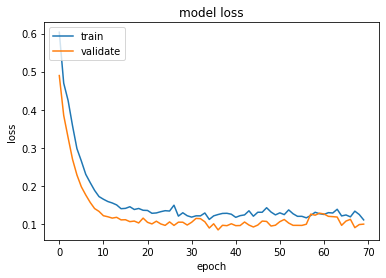

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

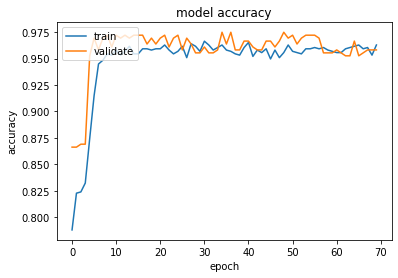

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
print(model.predict_proba(X_test))


[[0.99506617 0.00493386]
 [0.9951352  0.00486484]
 [0.9966138  0.0033862 ]
 [0.9966138  0.0033862 ]
 [0.99661314 0.00338688]
 [0.99661374 0.00338623]
 [0.9966138  0.0033862 ]
 [0.99644446 0.00355557]
 [0.9966138  0.0033862 ]
 [0.99658334 0.00341663]
 [0.9733151  0.02668491]
 [0.9939439  0.0060561 ]
 [0.9937725  0.00622752]
 [0.9966138  0.0033862 ]
 [0.9964758  0.00352418]
 [0.99661326 0.00338677]
 [0.99658835 0.00341165]
 [0.9966138  0.0033862 ]
 [0.9966138  0.0033862 ]
 [0.97021484 0.02978516]
 [0.9966136  0.00338635]
 [0.034262   0.965738  ]
 [0.9901712  0.00982878]
 [0.99489814 0.00510186]
 [0.8534738  0.14652625]
 [0.9965683  0.00343168]
 [0.99661374 0.00338629]
 [0.99440897 0.00559103]
 [0.9878589  0.01214114]
 [0.9966063  0.00339371]
 [0.9966138  0.0033862 ]
 [0.9964954  0.00350457]
 [0.99659336 0.00340667]
 [0.034262   0.965738  ]
 [0.9966138  0.0033862 ]
 [0.9966138  0.0033862 ]
 [0.9966138  0.0033862 ]
 [0.99165726 0.00834277]
 [0.99538445 0.00461552]
 [0.99464476 0.00535521]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
arr = model.predict(X_test)
print(model.predict(X_test))

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from keras.regularizers import l2
def create_model():
 
  model=Sequential()
  model.add(Dense(16, kernel_initializer = 'uniform', activation = 'tanh',kernel_regularizer=l2(0.001)))
  model.add(Dense(8, kernel_initializer = 'uniform', activation = 'tanh'))
  model.add(Dense(1, activation = "sigmoid"))

  adam = Adam(lr = 0.001)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn = create_model, batch_size = 50, epochs = 70)
H = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=70, batch_size=50)

Epoch 1/70
17/17 [==============================] - 1s 14ms/step - loss: 0.5635 - accuracy: 0.8088 - val_loss: 0.3602 - val_accuracy: 0.8663
Epoch 2/70
17/17 [==============================] - 0s 4ms/step - loss: 0.3990 - accuracy: 0.8087 - val_loss: 0.2862 - val_accuracy: 0.8691
Epoch 3/70
17/17 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.8395 - val_loss: 0.2299 - val_accuracy: 0.8719
Epoch 4/70
17/17 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.8735 - val_loss: 0.1851 - val_accuracy: 0.9721
Epoch 5/70
17/17 [==============================] - 0s 5ms/step - loss: 0.1959 - accuracy: 0.9614 - val_loss: 0.1558 - val_accuracy: 0.9610
Epoch 6/70
17/17 [==============================] - 0s 4ms/step - loss: 0.1650 - accuracy: 0.9604 - val_loss: 0.1399 - val_accuracy: 0.9666
Epoch 7/70
17/17 [==============================] - 0s 4ms/step - loss: 0.1673 - accuracy: 0.9570 - val_loss: 0.1309 - val_accuracy: 0.9694
Epoch 8/70
17/17 [=

In [ ]:
seed = 7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results2 = cross_val_score(model, X, y, cv=kfold)

Epoch 1/70
22/22 [==============================] - 1s 1ms/step - loss: 0.6174 - accuracy: 0.6739
Epoch 2/70
22/22 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8122
Epoch 3/70
22/22 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8601
Epoch 4/70
22/22 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.8582
Epoch 5/70
22/22 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9509
Epoch 6/70
22/22 [==============================] - 0s 1ms/step - loss: 0.1600 - accuracy: 0.9694
Epoch 7/70
22/22 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9530
Epoch 8/70
22/22 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9588
Epoch 9/70
22/22 [==============================] - 0s 1ms/step - loss: 0.1525 - accuracy: 0.9483
Epoch 10/70
22/22 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9551
Epoch 11/70
22/22 [

In [ ]:
# evaluate using 10-fold cross validation
print(results2.mean())

0.9631652653217315


In [ ]:
print(model.score(X_test, y_test))

8/8 [==============================] - 0s 2ms/step - loss: 0.0940 - accuracy: 0.9694
0.9693593382835388


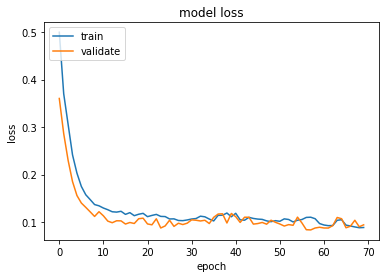

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

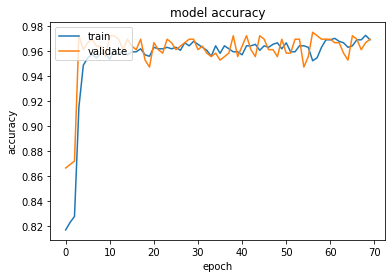

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()